<img src="http://www.cidaen.es/assets/img/mCIDaeNnb.png" alt="Logo CiDAEN" align="right">

<h1><font size=4>Trabajo Fin de Master (TFM)</font></h1>
<br>
<h2><font size=6>WiDS Datathon 2024 - Challenge 2</font></h2>
<h3><font size=5>Modelos de regresión para estimación del periodo de diagnóstico metastático</font></h3>
<h1><font size=4>Alumna: Luna Jiménez Fernández</font></h1>
<br>


<div align="right">
<font size=3>Máster en Ciencia de Datos e Ingeniería de Datos en la Nube</font><br>
<font size=3>Universidad de Castilla-La Mancha</font>
</div>

<br>

---

INTRO A LA LIBRETA

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Importing main libraries
import numpy as np
import pandas as pd

# Importing statistic methods
from scipy.stats import kruskal, f_oneway

# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

---

# Índice

* [1. Explicación y carga del conjunto de datos](#section1)
    * [1.1. Descripción del conjunto de datos](#section1-1)
    * [1.2. Características y variable objetivo](#section1-2)
    * [1.3. Carga y verificación](#section1-3)
* [2. Análisis exploratorio de datos (EDA)](#section2)
    * [2.1. Exploración inicial](#section2-1)
    * [2.2. Valores perdidos](#section2-2)
    * [2.3. Estudio de atributos categóricos](#section2-3)
    * [2.4. Estudio de atributos numéricos](#section2-4)
    * [2.5. Estudio de atributos geo-económicos](#section2-5)
* [3. Pre-procesamiento de los datos y construcción de pipelines](#section3)
* [4. Modelos de regresión](#section4)
* [5. Experimentación](#section5)
* [6. Análisis](#section6)
* [7. Conclusiones](#section7)
---

<a id="section1"></a>
# 1. Explicación y carga del conjunto de datos

En este apartado se procede a explicar tanto el **problema a resolver** como las **variables disponibles** dentro del conjunto de datos. 

Tras esto, se realiza la **carga inicial** del conjunto - comprobando que no exista ningún problema con los datos.

---

<a id="section1-1"></a>
## 1.1. Descripción del conjunto de datos
<br>

La desigualdad a la hora de acceder a los servicios médicos es uno de los principales problemas a nivel global en la actualidad. Ahora bien, pueden existir motivos adiciones que afecten a este acceso - como la **condición socioeconómica** o los **patrones climáticos**.

El **objetivo** de este conjunto de datos es **estudiar la relación** que existe entre estos factores (económicos y climáticos) y el **tiempo necesario para que los pacientes reciban un diagnóstico** - en este caso concreto, se busca crear modelos de **regresión** capaces de predecir el tiempo necesario para recibir un diagnóstico de **metástasis de cancer** en base a diversos factores médicos, demográficos y climáticos.

El problema expuesto fue el **segundo desafío** del **Women in Data Science (*WiDS*) Datathon** del año 2024, disponible en el [siguiente enlace](https://www.kaggle.com/competitions/widsdatathon2024-challenge2/overview).

---

<a id="section1-2"></a>
## 1.2. Características y variable objetivo
<br>

Como se ha comentado previamente, el conjunto de datos contiene información **médica**, **demográfica** y **climática** sobre aproximádamente **19.000 pacientes estadounidenses** con diagnóstico de metástasis - incluyendo como objetivo a predecir el **tiempo que se ha tardado en recibir un diagnóstico**.

Desglosando en más detalle las **variables** contenidas en el conjunto de datos:

### Variable objetivo

La variable que se busca predecir es **`metastatic_diagnosis_period`**.

Esta variable numérica representa el **tiempo (en días) transcurrido entre el primer diagnóstico de cancer y el diagnóstico de metástasis**.

### Variables predictoras

Las **variables predictoras** utilizadas para predecir la variable objetivo se pueden dividir en **tres grandes grupos**, dependiendo del tipo de información que aportan:

#### Variables médicas y relacionadas con el paciente

En general, estas variables se refieren a datos personales del paciente en el momento del diagnóstico - principalmente **datos identificativos y médicos**.

- `patient_id`: Identificador único del paciente.
- `patient_race`: Identificador de la raza del paciente.
- `payer_type`: Tipo de seguro médico (Medicaid, Comercial...).
- `patient_state`: Estado (Alabama, Arkansas...) en el que se encontraba el paciente.
- `patient_zip3`: Primeros tres dígitos del codigo ZIP (equivalente al código postal) del paciente.
- `patient_age`: Edad del paciente.
- `patient_gender`: Género del paciente (masculino o femenino).
- `bmi`: Índice de Masa Corporal (*IMC*) del paciente tomado **tras el diagnóstico**.
- `breast_cancer_diagnosis_code`: Código ICD (*International Classification of Diseases*) del tipo de diagnóstico. Puede ser un código **ICD09** o **ICD10**.
- `breast_cancer_diagnosis_desct`: Descripción en texto plano del código ICD.
- `metastatic_cancer_diagnosis_code`: Código ICD10 del diagnóstico.
- `metastatic_first_novel_treatment`: Nombre de la medicación utilizada en el **primer tratamiento** tras el diagnóstico.
- `metastatic_first_novel_treatment_type`: Descripción del tipo de medicación utilizado en el **primer tratamiento** tras el diagnóstico.

#### Variables socioeconómicas

Estas variables están referidas a datos **socioeconómicos** relacionados con la ubicación geográfica del paciente en el momento del diagnóstico. Por lo general, son datos estadísticos asociados al **estado** y **código zip** del paciente - y no varían entre pacientes ubicados en el mismo lugar.

Se pueden agrupar de nuevo estas variables en tres sub-conjuntos:

##### *- Variables referidas al porcentaje de la población*

Estas variables se refieren a **estadísticas socioeconómicas y demográficas** asociadas a la población del código zip. 
Concretamente, todas las variables dentro de esta sección están representadas como el **porcentaje de la población** que cumple la descripción.

- `male`: Personas identificadas como hombres.
- `female`: Personas identificadas como mujeres.
- `married`: Personas casadas.
- `divorced`: Personas divorciadas.
- `never_married`: Personas que nunca han contraido matrimonio.
- `widowed`: Personas viudas.
- `education_college_or_above`: Residentes con estudios universitarios o superiores (de, al menos, cuatro años)
- `labor_force_participation`: Residentes con trabajos (incluyendo solo a personas mayores de 16 años)
- `unemployment_rate`: Residentes en el paro.
- `disabled`: Residentes con alguna discapacidad.
- `limited_english`: Residentes que hablan inglés de forma limitada.
- `health_uninsured`: Residentes sin seguro médico.
- `veteran`: Residentes veteranos del ejercito.
- `income_household_six_figure`: Hogares con ingresos superiores a *100.000* dolares.
- `home_ownership`: Hogares con casa en propiedad.
- `poverty`: Hogares viviendo por debajo del umbral de la pobreza.
- `self_employed`: Hogares con ingresos provenientes de actividades autónomas.
- `farmer`: Hogares con ingresos provenientes de trabajos en el campo.

Además, existe varios conjuntos de variables que se refieren al **porcentaje de la población que pertenece a una categoría dentro de una variable concreta**.

Las siguientes variables hacen referencia a la **raza** de la población:
- `race_white`: Residentes de raza blanca.
- `race_black`: Residentes de raza negra o afroamericana.
- `race_asian`: Residentes de raza asiática.
- `race_native`: Residentes de raza nativa (americana, Alaska...)
- `race_pacific`: Residentes de raza del pacífico (hawaianos y otras islas del oceano Pacífico)
- `race_other`: Residentes cuya raza no está incluida en las razas anteriores.
- `race_multiple`: Residentes con dos o más razas.
- *`hispanic`*: Residentes latinos o hispánicos - entendiendo en este caso "hispano" como una **etnicidad** y no una raza.

Las siguientes variables hacen referencia a la **edad** de la población:
- `age_under_10`: Residentes entre 0 y 9 años.
- `age_10_to_19`: Residentes entre 10 y 19 años.
- `age_20s`: Residentes entre 20 y 29 años.
- `age_30s`: Residentes entre 30 y 39 años.
- `age_40s`: Residentes entre 40 y 49 años.
- `age_50s`: Residentes entre 50 y 59 años.
- `age_60s`: Residentes entre 60 y 69 años.
- `age_70s`: Residentes entre 70 y 79 años.
- `age_over_80`: Residentes de más de 80 años.

Las siguientes variables hacen referencia a los **ingresos** de los hogares:
- `income_household_under_5`: Hogares con ingresos inferiores a *5.000* dolares.
- `income_household_5_to_10`: Hogares con ingresos entre *5.000* y *10.000* dolares.
- `income_household_10_to_15`: Hogares con ingresos entre *10.000* y *15.000* dolares.
- `income_household_15_to_20`: Hogares con ingresos entre *15.000* y *20.000* dolares.
- `income_household_20_to_25`: Hogares con ingresos entre *20.000* y *25.000* dolares.
- `income_household_25_to_35`: Hogares con ingresos entre *25.000* y *35.000* dolares.
- `income_household_35_to_50`: Hogares con ingresos entre *35.000* y *50.000* dolares.
- `income_household_50_to_75`: Hogares con ingresos entre *50.000* y *75.000* dolares.
- `income_household_75_to_100`: Hogares con ingresos entre *75.000* y *100.000* dolares.
- `income_household_100_to_150`: Hogares con ingresos entre *100.000* y *150.000* dolares.
- `income_household_150_over`: Hogares con ingresos superiores a *150.000* dolares.

Las siguientes variables hacen referencia al **nivel de estudio** de la población:
- `education_less_highschool`: Residentes sin estudios de secundaria o superiores.
- `education_highschool`: Residentes con estudios de secundaria, pero no superiores.
- `education_some_college`: Residentes con algún estudio universitario, pero no superior.
- `education_bachelor`: Residentes con un grado universitario (o equivalente), pero no superior.
- `education_graduate`: Residentes con estudios post-grado o superior.
- *`education_stem_degree`*: Residentes con un grado universitario (o equivalente) o superior, en un campo **STEM** (*Science, Technology, Engineering, Mathematics*) - un subconjunto de las dos variables anteriores.

##### *- Variables referidas a la mediana del valor en la población*

Estas variables, de nuevo, se refieren a **estadísticas socioeconómicas** asociadas a la población del código zip.

En este caso, las variables representan la **mediana** del valor en la población para el atributo descrito.

- `age_median`: Edad de los residentes.
- `income_household_median`: Ingresos del hogar (en dólares)
- `income_individual_median`: Ingresos por persona (en dólares)
- `home_value`: Valor de las residencias de loshogares (teniendo en cuenta únicamente los hogares en propiedad)
- `rent_median`: Coste del alquiler.
- `rent_burden`: Coste del alquiler - representado como el **porcentaje del ingreso del hogar** dedicado a pagar el alquiler.
- `commute_time`: Tiempo que se tarda en llegar al trabajo (en minutos)
- `poverty`: Hogares viviendo por debajo del umbral de la pobreza.
- `self_employed`: Hogares con ingresos provenientes de actividades autónomas.
- `farmer`: Hogares con ingresos provenientes de trabajos en el campo.

##### *- Otras variables geo-demográficas asociadas al código Zip*

Estas variables están asociadas a la **ubicación geográfica** y los detalles estadísticos relacionados - pero no representan un porcentaje o una mediana.

- `region`: Región en la que se ubica el paciente.
- `division`: División en la que se ubica el paciente.
- `population`: Población estimada asociada al código Zip.
- `density`: Densidad de población estimada asociada al código Zip (en personas por kilómetro cuadrado)
- `family_size`: Tamaño promedio de las familias en la población asociada al código Zip.
- `housing_units`: Número de hogares en la población.

#### Variables climáticas

Además de las variables médicas y socioeconómicas descritas en los dos puntos anteriores, existe un conjunto de **72 variables** representando la **temperatura promedio (*en grados Farenheit*)** asociada a la ubicación del código zip. Todas las variables tienen el siguiente aspecto:

> `Average of <MES>-<AÑO>`

Donde:

- `MES`: El mes del año, representado en formato de mes de tres letras (*Jan, Feb, Mar...*)
- `AÑO`: El año en el que se ha realizado la medición - entre **2013** y **2018** - en formato ISO de año de dos cifras (*13, 14, 15...*)

---

<a id="section1-3"></a>
## 1.3. Carga y verificación del conjunto de datos
<br>

El último paso antes de realizar un análisis exploratorio es **cargar el conjunto de datos** a un *DataFrame*.

En este caso, hay disponibles **dos** ficheros conteniendo datos estructurados de forma tabular en formato `.csv`:
- `data/train.csv`: Conjunto de **entrenamiento**.
- `data/test.csv`: Conjunto de **test**.

Para evitar posibles fugas de datos y hacer un análisis exploratorio de los datos más honesto, se cargará y trabajará durante toda la libreta con el **conjunto de entrenamiento** - de ahora en adelante llamado `df_metastasis`:

In [2]:
# Loading the full training dataset - for EDA purposes
df_metastasis = pd.read_csv(
    "data/train.csv",
    index_col="patient_id"          # Using patient_id as ID for the dataframe
)

# Display the first ten entries to ensure that nothing is missing
display(df_metastasis.head(10))

# Display the shape
print(f"Shape: {df_metastasis.shape}")

,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,...,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
patient_id,,,,,,,,,,,,,,,,,,,,,
268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,F,NaN,C50912,...,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191
484983,White,NaN,IL,629,Midwest,East North Central,55,F,35.36,C50412,...,49.30,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71,33
277055,NaN,COMMERCIAL,CA,925,West,Pacific,59,F,NaN,1749,...,68.50,70.31,78.61,87.24,85.52,80.75,70.81,62.67,55.58,157
320055,Hispanic,MEDICAID,CA,900,West,Pacific,59,F,NaN,C50911,...,63.34,63.10,67.45,75.86,75.24,71.10,68.95,65.46,59.46,146
190386,NaN,COMMERCIAL,CA,934,West,Pacific,71,F,NaN,1748,...,59.45,60.24,64.77,69.81,70.13,68.10,65.38,60.72,54.08,286
559027,NaN,COMMERCIAL,IN,461,Midwest,East North Central,63,F,NaN,1749,...,45.86,71.10,74.27,74.89,74.57,70.70,55.43,37.13,35.43,73
293747,White,MEDICARE ADVANTAGE,OH,448,Midwest,East North Central,57,F,33.10,C50412,...,42.62,65.91,71.26,74.03,73.94,69.12,53.50,36.43,34.10,59
517596,White,COMMERCIAL,DE,198,South,South Atlantic,56,F,31.05,C50411,...,48.41,65.17,70.63,75.82,76.17,70.00,56.65,40.90,37.68,316
533188,NaN,COMMERCIAL,LA,706,South,West South Central,65,F,NaN,C50212,...,63.74,77.51,81.80,83.07,82.46,80.32,71.56,56.24,53.39,86


Shape: (13173, 151)


El conjunto de datos parece cargarse adecuadamente, y los valores de las variables son consistentes a simple vista - si bien hay algunos valores perdidos.

Ahora bien, es necesario un análisis más exhaustivo para comprender mejor los datos - y estudiar las relaciones que existen entre éstos y el tiempo de diagnóstico.

---

<a id="section2"></a>

# 2. Análisis exploratorio de datos (EDA)

Una vez se ha cargado el conjunto de datos, el primer paso en el proceso de la Ciencia de Datos consiste en realizar un **análisis exploratorio de datos (*EDA*)** - estudiar el conjunto de datos con el fin de conocerlo mejor, de cara a poder enfocar el procesamiento y la creación de modelos posterior.

Para ello, se va a realizar una exploración detallada del conjunto de datos completo - con el objetivo de **entender mejor el comportamiento de los datos**.

---

<a id="section2-1"></a>

## 2.1. Exploración inicial

El primer paso para estudiar el conjunto de datos es **comprobar su tamaño** - el número de instancias y el número de variables:

In [3]:
# Extract number of entries and number of columns
entries, columns = df_metastasis.shape
print(f"Número de instancias: {entries}")
print(f"Número de variables total: {columns}")
print(f"\tAtributos: {columns-1}")
print(f"\tVariable objetivo: 1")

Número de instancias: 13173
Número de variables total: 151
	Atributos: 150
	Variable objetivo: 1


A primera vista, el conjunto contiene **13173 instancias** - un número considerable, pero que puede resultar limitado si se quisieran usar modelos más complejos de aprendizaje profundo.

Además, cada instancia contiene valores para **151** variables - **150 atributos** y la **variable a predecir**. El número de variables es elevado, por lo que será necesario estudiar la relevancia de las variables para poder realizar una **selección de atributos**.

---

El siguiente paso sería estudiar los **tipos de las variables** - estudiar cuantas de las variables son **numéricas**, y cuantas son **categóricas**.

In [4]:
# Separate the numerical and categorical variables
df_numerical = df_metastasis.select_dtypes(include=["int64", "float64"])
df_categorical = df_metastasis.select_dtypes(include=["object"])

print(f"Variables numéricas: {len(df_numerical.columns)} (incluyendo la variable objetivo)")
print(f"Variables categóricas: {len(df_categorical.columns)}")

Variables numéricas: 140 (incluyendo la variable objetivo)
Variables categóricas: 11


De los **150 atributos** que se tienen:
- La amplia mayoría (**139**) y la **variable objetivo** son variables numéricas.
- Los atributos restantes (**11**) son **categóricos**.

Los atributos categóricos y algunos de sus valores estadísticos son los siguientes:

In [5]:
print("Atributos categóricos:")
display(
    df_categorical.describe().transpose()
)

Atributos categóricos:


,count,unique,top,freq
patient_race,6516,5,White,3565
payer_type,11408,3,COMMERCIAL,6297
patient_state,13173,44,CA,2377
Region,13173,4,South,3960
Division,13173,8,East North Central,3010
patient_gender,13173,1,F,13173
breast_cancer_diagnosis_code,13173,47,1749,1947
breast_cancer_diagnosis_desc,13173,47,"Malignant neoplasm of breast (female), unspeci...",1947
metastatic_cancer_diagnosis_code,13173,43,C773,7308
metastatic_first_novel_treatment,11,2,OLAPARIB,6


Como se puede observar, **algunos atributos tienen valores inesperados** - ya sean **una elevada cantidad de valores perdidos** o **tener un único valor en todos los atributos**. Esto se estudiará en más detalle en las secciones posteriores.

Debido al gran número de valores numéricos, no se pueden mostrar todas las variables a la vez. Aun así, se puede observar una muestra de los atributos numéricos y sus valores estadísticos:

In [6]:
print("Atributos numéricos:")
display(
    df_numerical.describe().transpose()
)

Atributos numéricos:


,count,mean,std,min,25%,50%,75%,max
patient_zip3,13173.0,568.530859,275.758485,100.00,330.000,557.00,832.00,995.00
patient_age,13173.0,59.271313,13.218883,18.00,50.000,59.00,67.00,91.00
bmi,4102.0,29.168808,5.752820,15.00,24.825,28.58,33.00,97.00
population,13173.0,20651.373928,13840.379638,635.55,9160.340,18952.78,30021.28,71374.13
density,13173.0,1776.872376,3876.061897,0.92,163.150,700.34,1666.52,29851.69
...,...,...,...,...,...,...,...,...
Average of Sep-18,13166.0,71.417027,6.502875,51.83,67.020,70.88,75.64,89.19
Average of Oct-18,13166.0,59.323286,9.261934,37.54,51.970,57.45,67.36,81.46
Average of Nov-18,13161.0,46.100150,12.245594,19.15,35.560,42.43,55.73,76.30
Average of Dec-18,13140.0,42.096213,11.209011,15.38,33.370,38.50,50.50,73.54


Si bien todos los atributos parecen tener comportamientos esperables, se puede observar que el atributo `patient_zip3` es una variable numérica. Ahora bien, si se observa en mayor detalle:

In [7]:
display(
    df_metastasis.head(10)
    .sort_values(by="patient_zip3")
)

,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,...,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
patient_id,,,,,,,,,,,,,,,,,,,,,
517596,White,COMMERCIAL,DE,198,South,South Atlantic,56,F,31.05,C50411,...,48.41,65.17,70.63,75.82,76.17,70.00,56.65,40.90,37.68,316
293747,White,MEDICARE ADVANTAGE,OH,448,Midwest,East North Central,57,F,33.10,C50412,...,42.62,65.91,71.26,74.03,73.94,69.12,53.50,36.43,34.10,59
559027,NaN,COMMERCIAL,IN,461,Midwest,East North Central,63,F,NaN,1749,...,45.86,71.10,74.27,74.89,74.57,70.70,55.43,37.13,35.43,73
484983,White,NaN,IL,629,Midwest,East North Central,55,F,35.36,C50412,...,49.30,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71,33
533188,NaN,COMMERCIAL,LA,706,South,West South Central,65,F,NaN,C50212,...,63.74,77.51,81.80,83.07,82.46,80.32,71.56,56.24,53.39,86
268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,F,NaN,C50912,...,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191
320055,Hispanic,MEDICAID,CA,900,West,Pacific,59,F,NaN,C50911,...,63.34,63.10,67.45,75.86,75.24,71.10,68.95,65.46,59.46,146
639484,White,COMMERCIAL,CA,922,West,Pacific,60,F,NaN,C50912,...,70.91,74.48,83.59,91.04,89.79,85.10,70.73,60.59,53.04,184
277055,NaN,COMMERCIAL,CA,925,West,Pacific,59,F,NaN,1749,...,68.50,70.31,78.61,87.24,85.52,80.75,70.81,62.67,55.58,157


El valor de `patient_zip3` no parece comportarse tanto como una variable numérica como una **variable categórica** - donde cada valor discreto representa una región del país. Esto se corresponde con su comportamiento descrito, y con **como será estudiada a continuación**.

In [8]:
# Move zip3 from numerical variables to categorical variables
if "patient_zip3" in df_numerical:
    df_categorical["patient_zip3"] = df_numerical["patient_zip3"].astype("str")
    df_numerical.drop(columns="patient_zip3")

Los dos tipos de atributos deben ser tratados de forma distinta durante el estudio y el pre-procesamiento de los datos; por lo que se estudiarán las dos categorías de forma separada.

---

Finalmente, se estudia la **distribución de la variable objetivo** - `metastatic_diagnosis_period`:

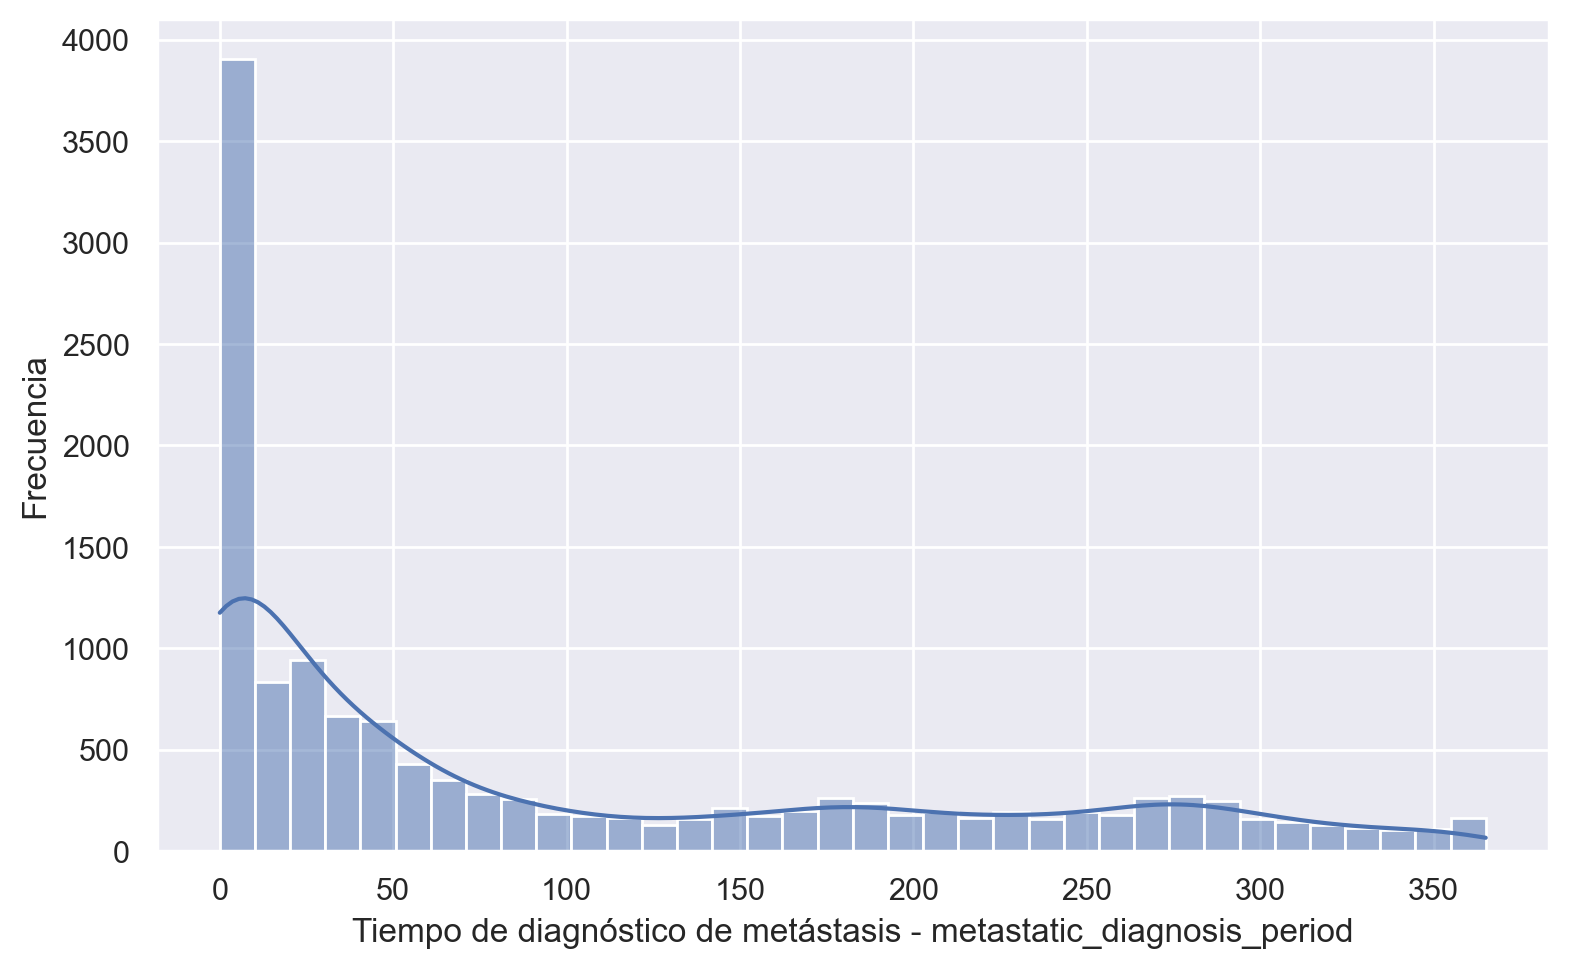

In [9]:
# Create the figure
plt.figure(figsize=(8, 5));

# Create a Histogram to display the distribution of the class variable
ax = sns.histplot(
    data=df_metastasis,
    x="metastatic_diagnosis_period",
    binwidth=10,
    kde=True
);

# Set a title and X/Y labels
ax.set(
    xlabel="Tiempo de diagnóstico de metástasis - metastatic_diagnosis_period",
    ylabel="Frecuencia"
);

# Show the figure
plt.tight_layout();
plt.show();

A simple vista, se observa que **la mayoría de casos** (aproximadamente *4000*) han recibido un diagnóstico de metástasis en un plazo menor a **10 días**. Ahora bien hay una cola significativa en la distribución - hay una cantidad de casos considerables que tardan un tiempo mayor, habiendo algunos *outliers* que pueden llegar a tardar **más de 350 días**.

De esta forma, parece que salvo casos aislados, la gran mayoría de casos tienen un diagnóstico muy rápido. Ahora bien, si se discretiza la variable en varios conjuntos:

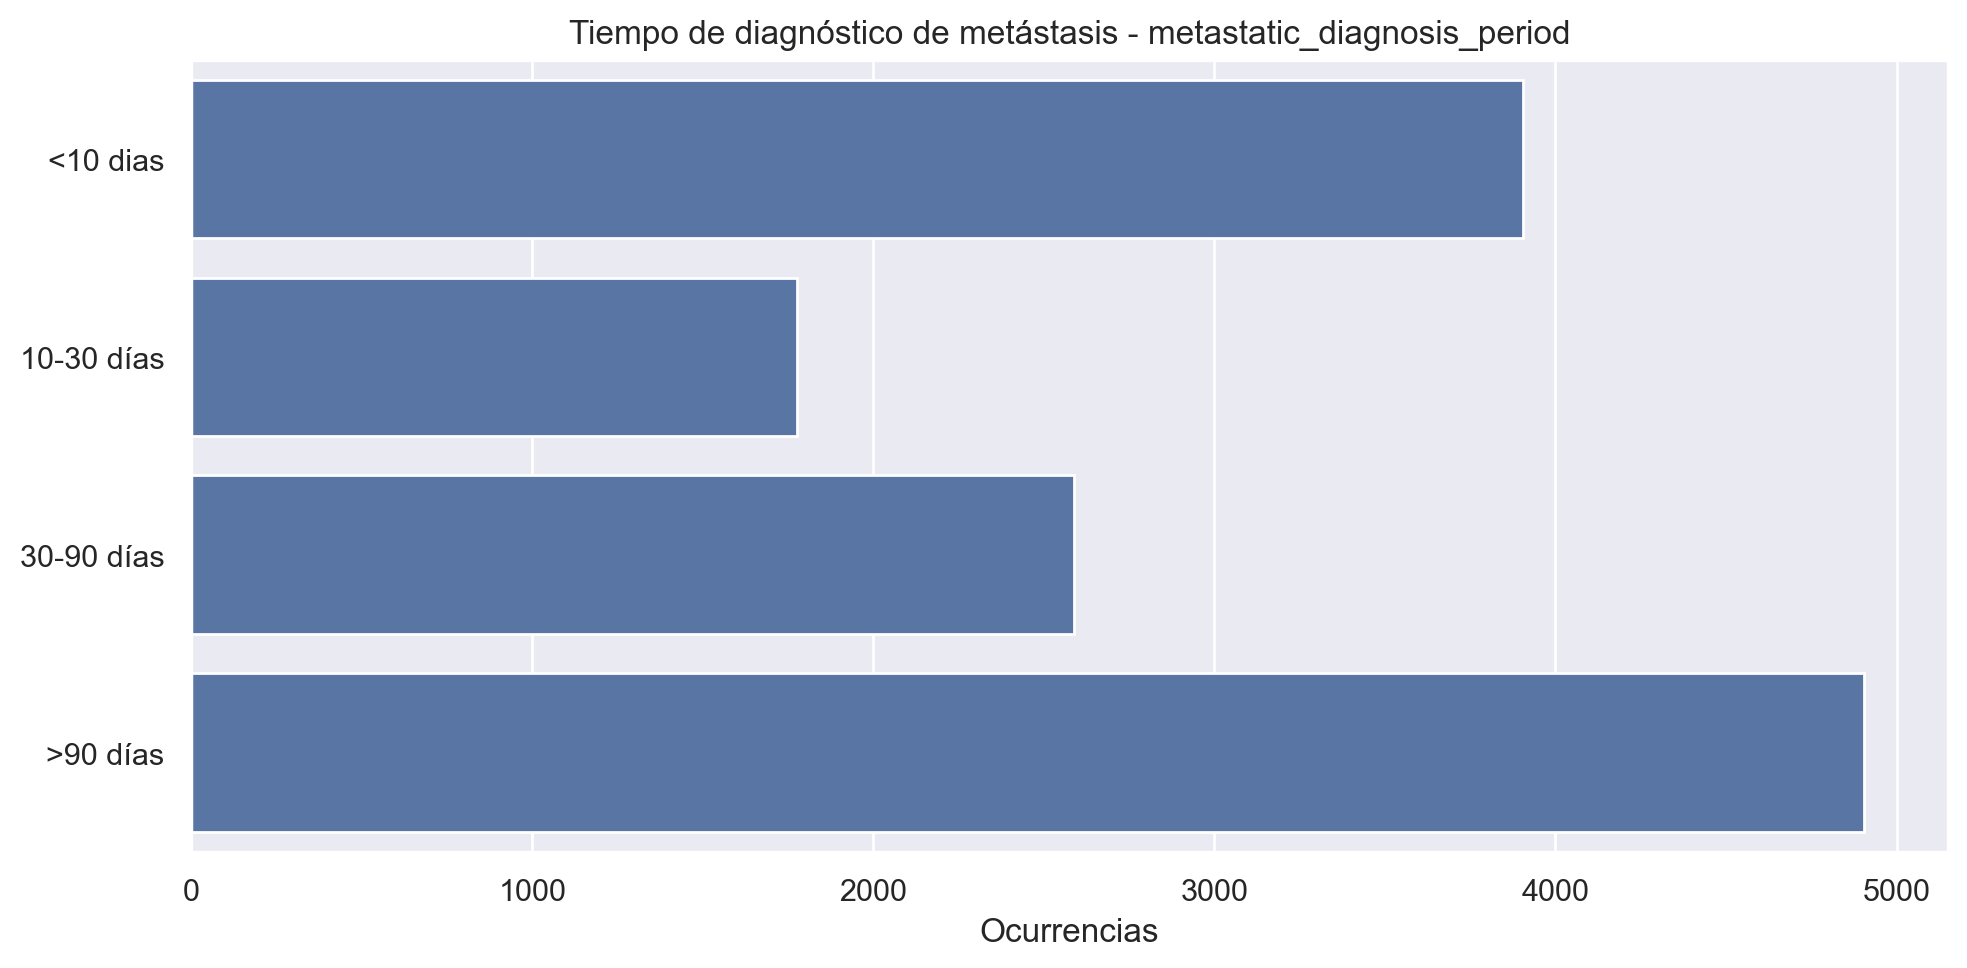

In [10]:
# Create the figure
plt.figure(figsize=(10, 5));

# Create a bar plot
ax = sns.countplot(
    # Data is divided into discrete ranges
    data = (pd.cut(df_metastasis["metastatic_diagnosis_period"],
           [-np.inf, 10, 30, 90, np.inf],
           labels=["<10 dias", "10-30 días", "30-90 días", ">90 días"]))
)

# Set a title and X/Y labels
ax.set(
    xlabel="Ocurrencias",
    ylabel="",
    title="Tiempo de diagnóstico de metástasis - metastatic_diagnosis_period"
);

# Show the figure
plt.tight_layout();
plt.show();

Si se observa la distribución de esta forma, se evidencia que aunque una cantidad considerable de los casos reciben un diagnóstico breve, **la mayoría de los casos tarda más de 90 días en ser diagnosticado**.

En las siguientes secciones se estudiarán los atributos del conjunto de datos de forma más pormenorizada.

---

<a id="section2-2"></a>

## 2.2. Valores perdidos

Antes de estudiar las distribuciones de los atributos y su relación con la variable objetivo, es interesante estudiar los **valores perdidos** en el conjunto de datos.

Al haber un número de variables muy elevado, se realizará un **estudio estadístico**:

In [11]:
# Missing values per column
missing_values = (
    # Obtain the number of missing values per column
    df_metastasis.isna()
    .sum()
)
# Columns with missing values
missing_values_cols = missing_values.apply(lambda e: e != 0)
# Total number of missing values
missing_values_total = missing_values_cols.sum()

print(f"Número de atributos con valores perdidos: {missing_values_total}")
print("Estadísticas de los valores perdidos:")
display(missing_values.loc[missing_values_cols].describe())


Número de atributos con valores perdidos: 72
Estadísticas de los valores perdidos:


count       72.000000
mean       624.013889
std       2512.579307
min          1.000000
25%          5.000000
50%          8.000000
75%         20.250000
max      13162.000000
dtype: float64

De los 150 atributos, **72** de ellos contienen valores perdidos. En promedio, cada atributo tiene **624 valores perdidos**.

Ahora bien, la distribución de estos valores perdidos está **sesgada** - la amplia mayoría de atributos tiene muy pocos valores perdidos, habiendo un número reducido de variables que contiene la amplia mayoria de los valores perdidos.

Si se estudian los valores perdidos de los **20 atributos con mayor número de valores perdidos**:

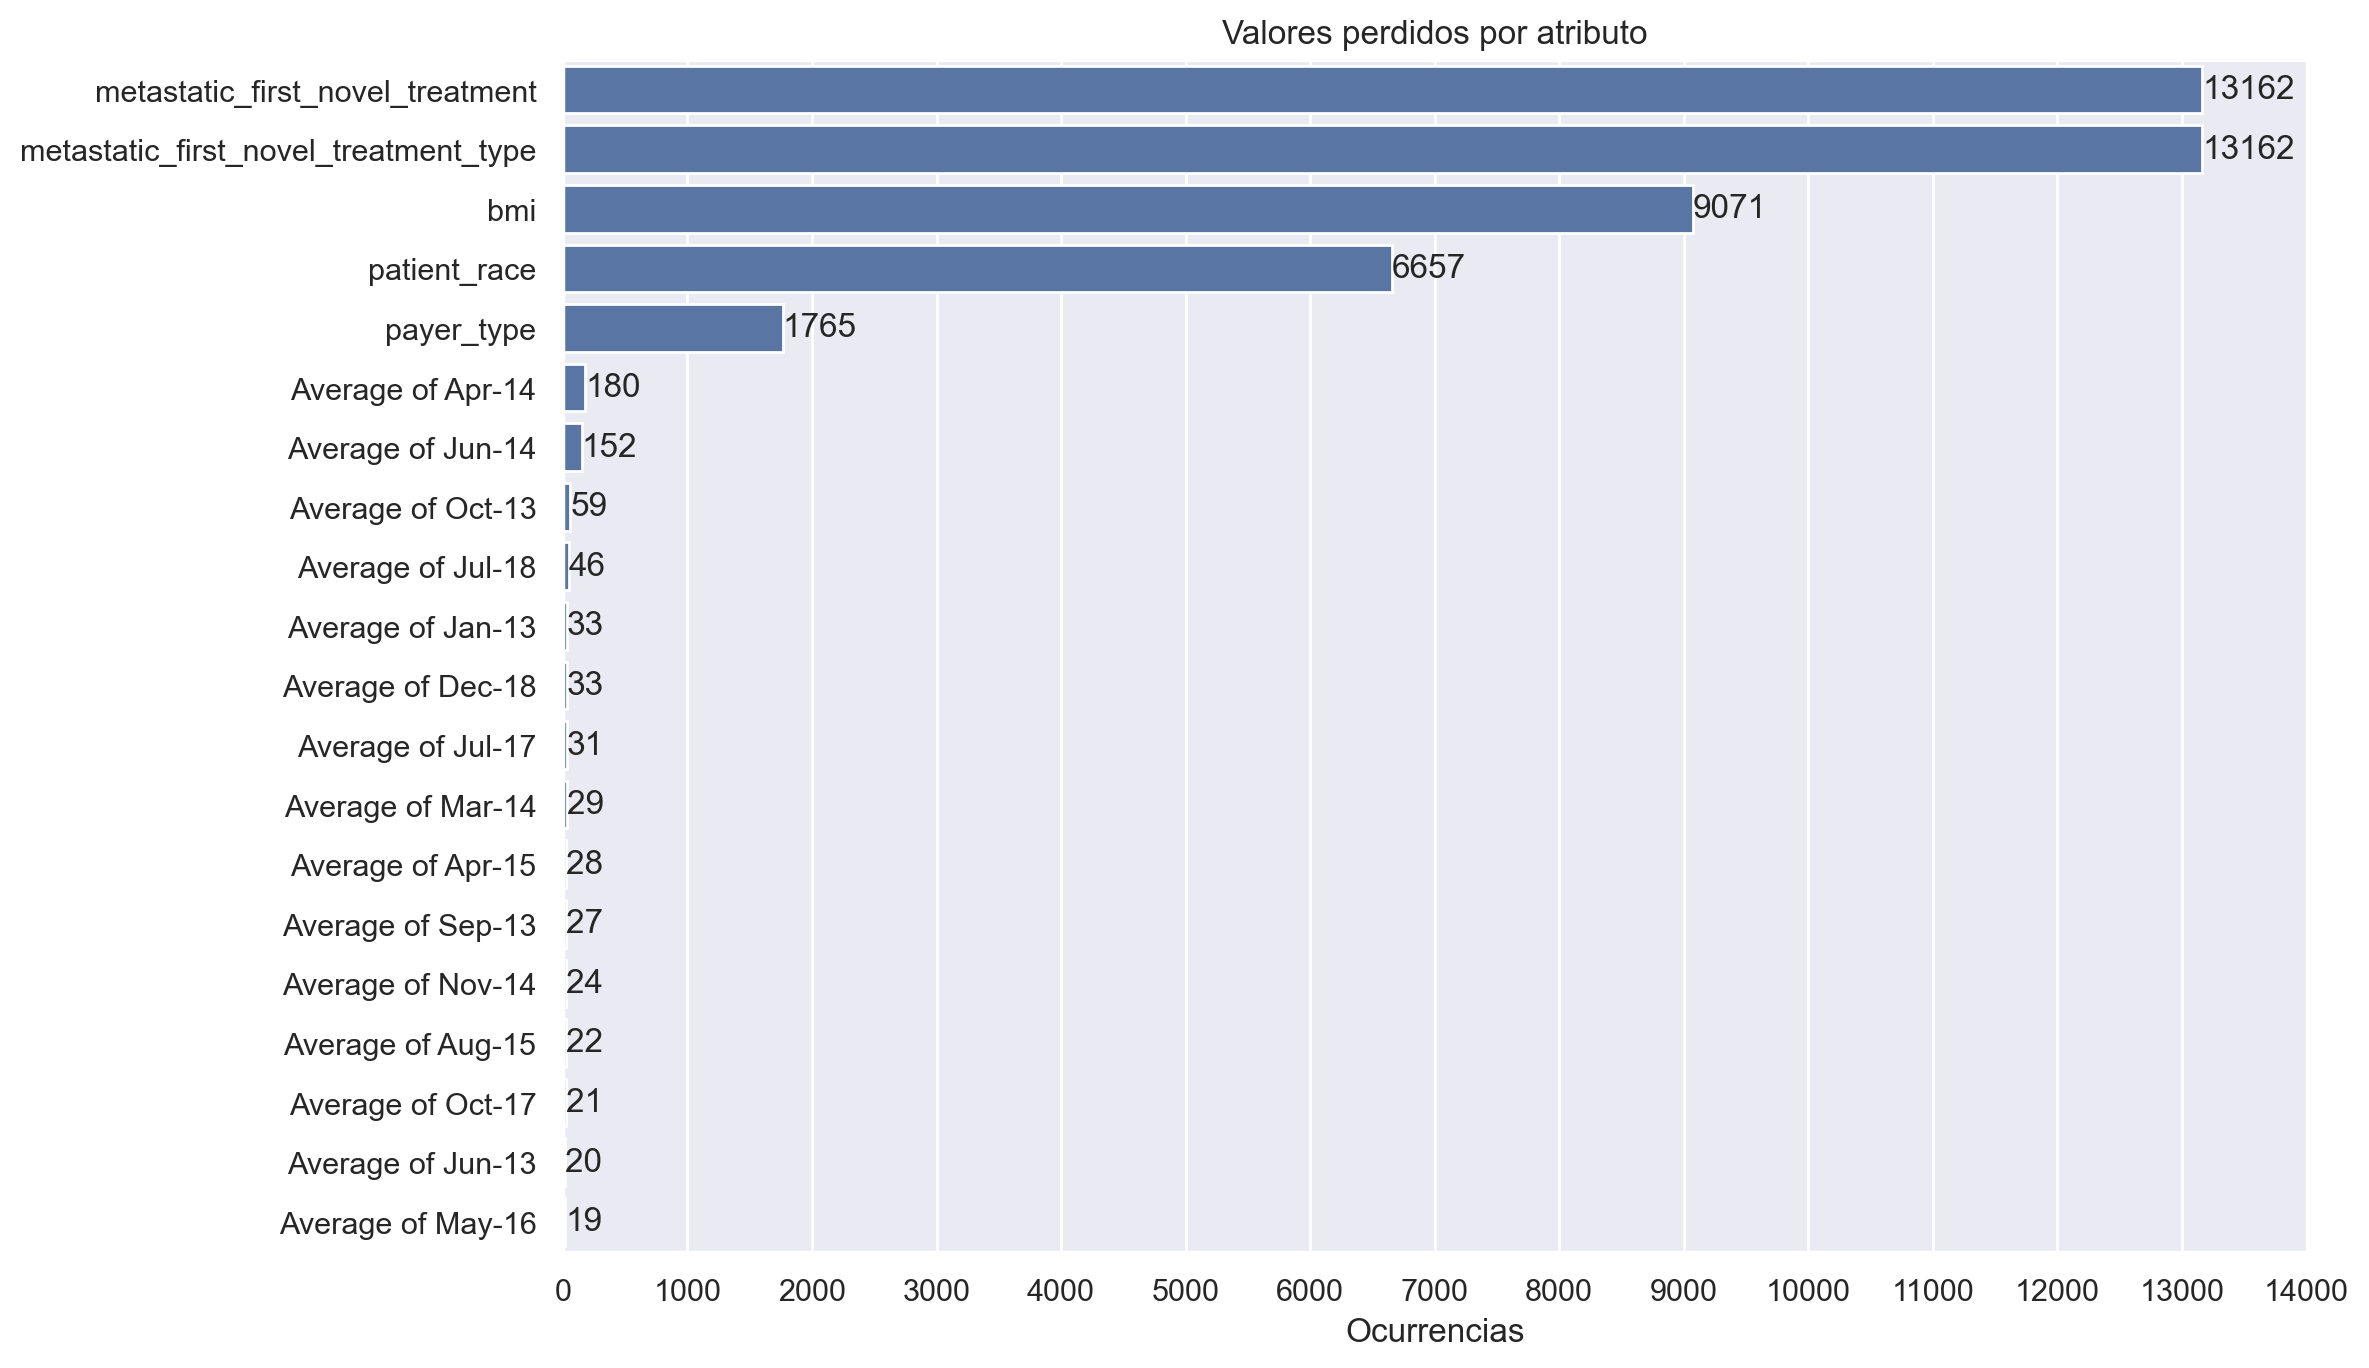

In [12]:
# Create the figure
plt.figure(figsize=(12, 7));

# Create a bar plot
ax = sns.barplot(
    # Data is ordered, and only the first 20 variables are kept
    data = (
        missing_values.loc[missing_values_cols]
        .sort_values(ascending=False)
        .nlargest(20)
    ),
    orient="h"
)

# Add numbers to each bar
ax.bar_label(ax.containers[0])

# Set a title and X/Y labels
ax.set(
    xlabel="Ocurrencias",
    ylabel="",
    title="Valores perdidos por atributo"
);

# Add more ticks to the X label
ax.set_xticks(range(0, 15000, 1000));

# Show the figure
plt.tight_layout();
plt.show();

Como se había comentado previamente, la gran mayoría de valores perdidos están concentrados en **cinco variables**:

- **`metastatic_first_novel_treatment` y `metastatic_first_novel_treatment_type`**: La medicina y el tipo de tratamiento aplicado tras el diagnóstico de metástasis. En este caso, **la práctica totalidad de las instancias no contiene valor para estas variables**.
    - Al tener únicamente **11 valores**, el atributo no resulta de interés para el estudio - y por tanto, lo más razonable sería **eliminarlo**.
- **`bmi`**: El índice de masa corporal. En este caso, **la mayoría de las instancias tienen un valor perdido** para este atributo.
    - A diferencia del caso anterior, hay un mayor número de valores. Ahora bien, al ser una variable numérica, **no hay un valor por defecto por el que se puedan reemplazar los valores perdidos** - por lo que sería también razonable **eliminar el atributo**.
- **`patient_race`**: La raza del paciente. Aproximadamente **la mitad de las instancias** tienen un valor perdido.
    - En este caso, puede resultar de interés **considerar los valores perdidos como un valor separado del atributo (*"Desconocido"*)**.
- **`payer_type`**: El tipo de seguro médico del paciente. Si bien es un número mucho más reducido, **aproximadamente una de cada diez instancias no tiene un valor para este atributo**.
    - Igual que en el caso anterior, puede ser de interés **considerar los valores perdidos como un valor separado del atributo (*Desconocido*)**

Para el resto de atributos, **el número de valores perdidos es mucho más reducido**, lo que permite que sean procesados de forma distinta - **eliminando las instancias con atributos perdidos**, por ejemplo.

---

<a id="section2-3"></a>

## 2.3. Estudio de atributos categóricos

Antes de empezar el estudio, se comprueban de nuevo las variables categóricas contenidas:

In [13]:
print("Atributos categóricos:")
display(
    df_categorical.describe().transpose()
)

Atributos categóricos:


,count,unique,top,freq
patient_race,6516,5,White,3565
payer_type,11408,3,COMMERCIAL,6297
patient_state,13173,44,CA,2377
Region,13173,4,South,3960
Division,13173,8,East North Central,3010
patient_gender,13173,1,F,13173
breast_cancer_diagnosis_code,13173,47,1749,1947
breast_cancer_diagnosis_desc,13173,47,"Malignant neoplasm of breast (female), unspeci...",1947
metastatic_cancer_diagnosis_code,13173,43,C773,7308
metastatic_first_novel_treatment,11,2,OLAPARIB,6


A la hora de estudiar atributos categóricos, no es posible realizar un estudio inicial de las **correlaciones** entre atributos. Por tanto, se optará por estudiar individualmente cada atributo, observando para cada uno de ellos:
- Su **distribución** de forma individual (en valores **totales** y de **porcentajes**)
- Su **distribución** en comparación con la variable objetivo.
- En caso de ser relevante, **tests estadísticos** con un **nivel de significación del 95% ($\alpha=0.05$)**:
    - **ANOVA** (test paramétrico que estudia si dos o más grupos **tienen medias iguales**).
    - **Kruskal-Wallis** (test no-paramétrico que estudia si dos o más grupos **tienen medianas iguales**).

Se incluye, además, un diccionario donde se almacenan los **p-valores** de los tests estadísticos, `categorical_p_values`:

In [14]:
categorical_p_values = {}

### **- Raza (`patient_race`**)

Como se comentó en el apartado previo, esta variable tiene un **número elevado de valores perdidos** - pero puede ser interesante estudiar estos valores perdidos como un grupo separado (*"Raza desconocida"*).

Por eso, el primer paso es el reemplazo de valores perdidos:

In [15]:
# Obtain the variable and the class
# Missing values are replaced with the "Unknown" tag
df_patient_race = (
    df_metastasis[["patient_race", "metastatic_diagnosis_period"]]
    .fillna("Unknown")
)

Tras esto, se observa la distribución de los valores de la clase:

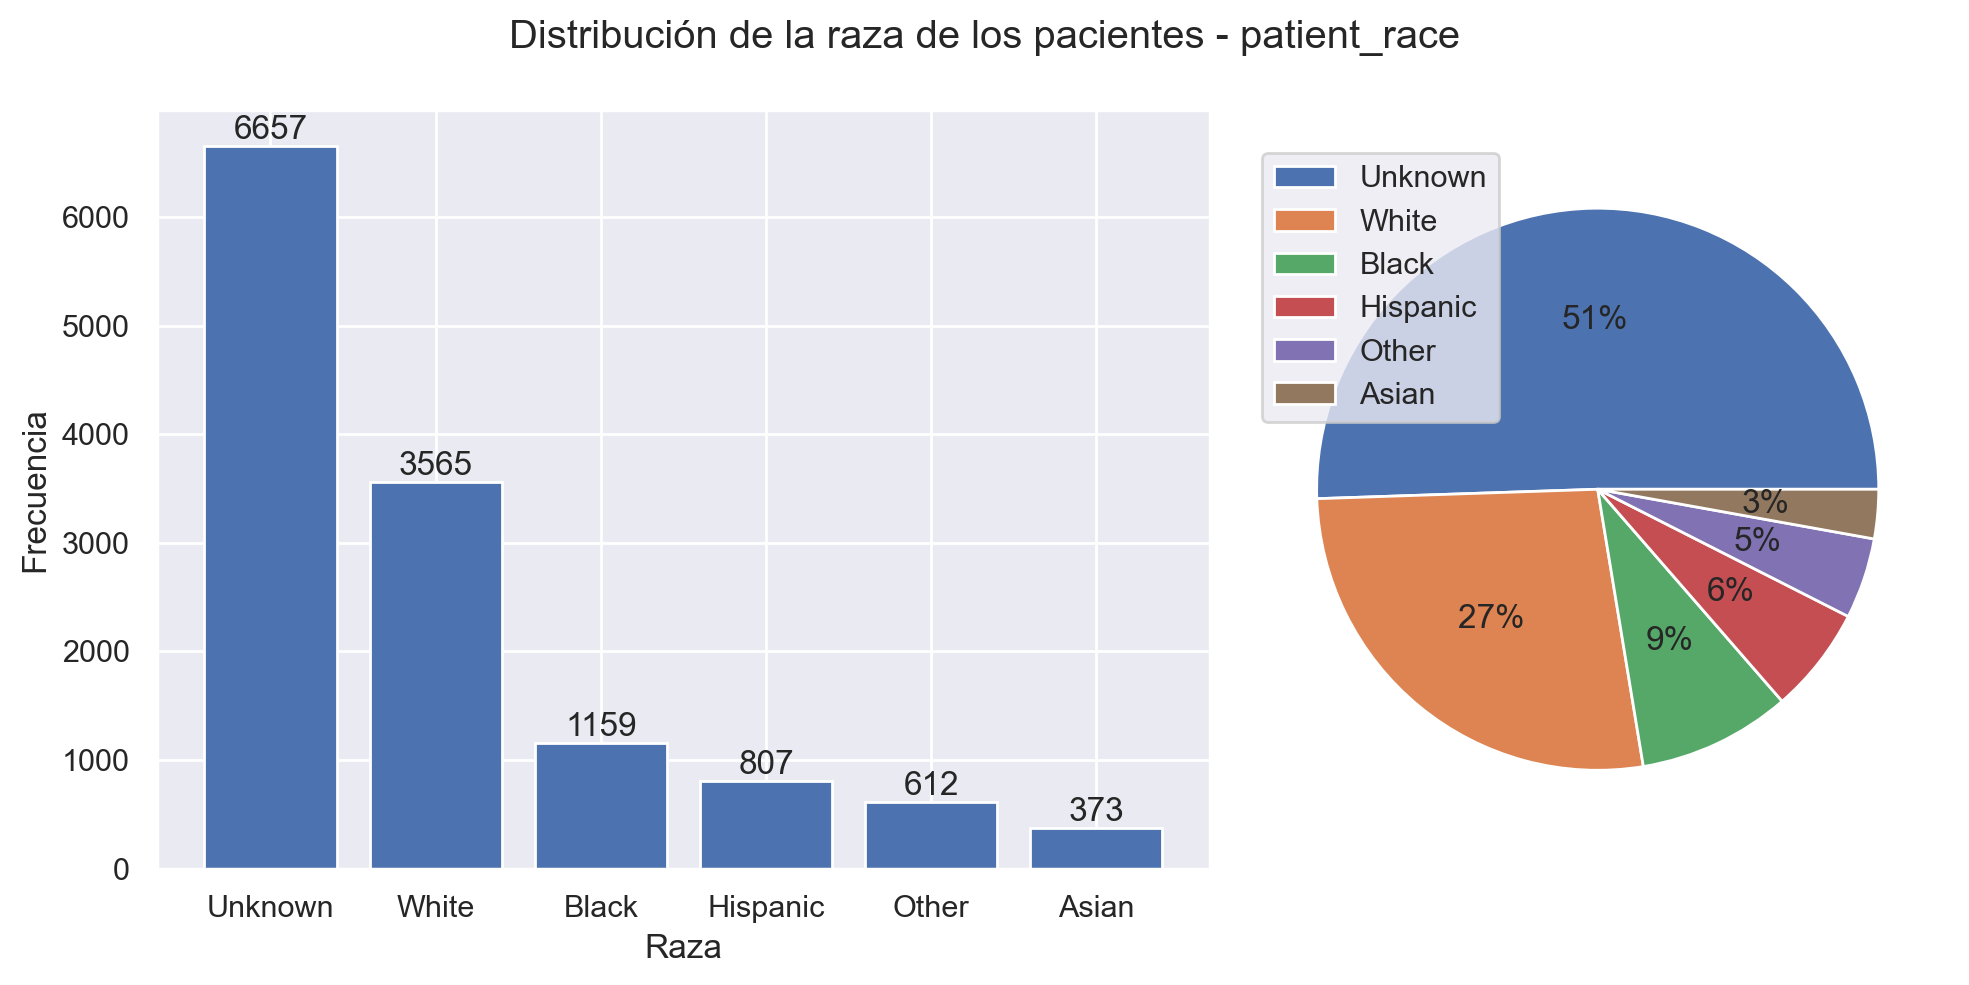

In [16]:
# Create the figure
fig, axs = plt.subplots(1, 2, 
                        figsize=(10, 5),
                        width_ratios=[1.5, 1]);

# FIGURE 1: Bar chart
axs[0].bar(x=df_patient_race["patient_race"].value_counts().index,
           height=df_patient_race["patient_race"].value_counts());
axs[0].bar_label(axs[0].containers[0]);
axs[0].set(xlabel="Raza",
           ylabel="Frecuencia")

# FIGURE 2: Pie plot
axs[1].pie(x=df_patient_race["patient_race"].value_counts(),
           autopct="%1.f%%");
axs[1].legend(df_patient_race["patient_race"].value_counts().index);

# Add a title to the figure
fig.suptitle("Distribución de la raza de los pacientes - patient_race")

# Show the figure
plt.tight_layout();
plt.show();

- Como era de esperar, **la mayor proporción de pacientes tienen una raza desconocida**. Esto podría ser relevante en el sentido de que podrían describir a pacientes que no se sienten cómodos diciendo su raza.
- De las razas "conocida", **la mayoría de pacientes son blancos** - tres veces más que la siguiente raza.
- Si bien parece que el resto de razas tienen pocos valores, hay **más pacientes de raza negra** - y los **pacientes de raza asiática** son la menor proporción.

Estudiando como se relaciona esta distribución con la variable objetivo:

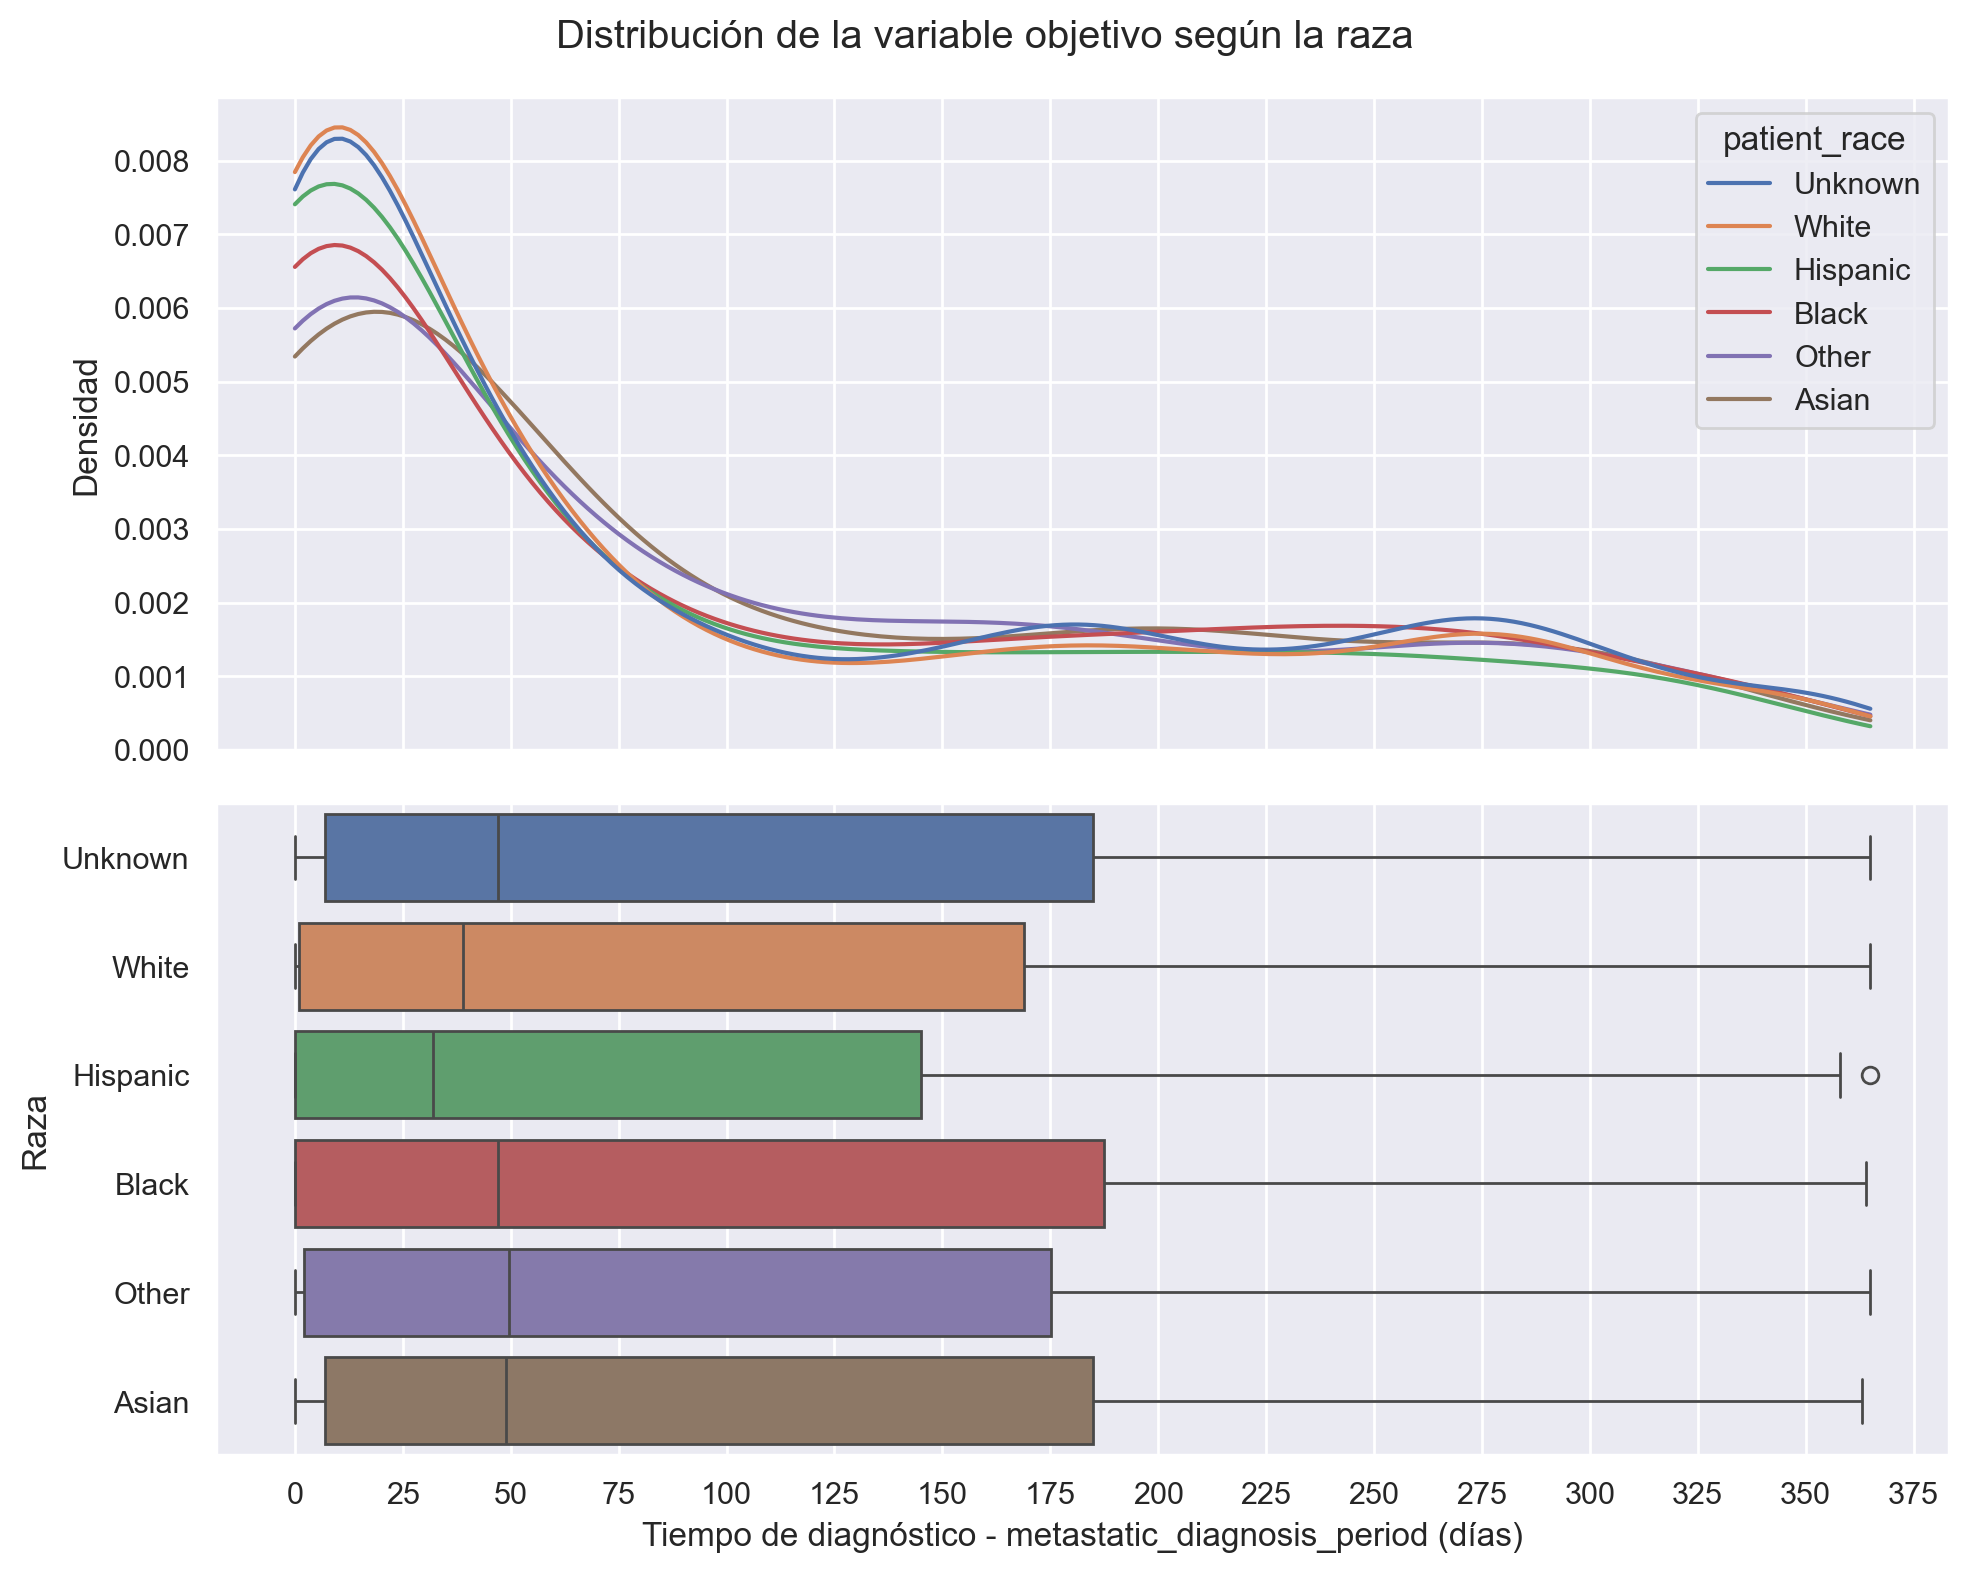

In [17]:
# Create the figures - sharing an X axis
fig, axs = plt.subplots(2, 1, 
                        figsize=(10, 8),
                        sharex=True);


# FIGURE 1 - KDE plot (density distribution)
sns.kdeplot(
    data=df_patient_race,
    x="metastatic_diagnosis_period",
    hue="patient_race",
    common_norm=False,
    clip=(0, df_patient_race["metastatic_diagnosis_period"].max()),
    ax=axs[0]
);
axs[0].set(ylabel="Densidad")

# FIGURE 2 - Box plot (distribution of values)
sns.boxplot(
    data=df_patient_race,
    y="patient_race",
    hue="patient_race",
    x="metastatic_diagnosis_period",
    ax=axs[1]
);
axs[1].set(ylabel="Raza",
           xlabel="Tiempo de diagnóstico - metastatic_diagnosis_period (días)")
axs[1].set_xticks(range(0, 400, 25));

# Add a title to the figure
plt.suptitle("Distribución de la variable objetivo según la raza")

# Show the figure
plt.tight_layout();
plt.show();

Todas las razas tienen una **distribución amplia** de valores - estando la mayoría de casos, en general, en un tiempo de diagnóstico entre **0 y 200 días**. Ahora bien:
- Las razas **blancas e hispánicas** parecen tener, en promedio, **un tiempo de diagnóstico más corto** - y, en el caso de la raza hispánica, una **distribución con un tiempo promedio más corto**.
- El resto de razas parecen tener un **tiempo de diagnóstico promedio más largo** - alrededor de los 50 días, si bien las personas cuya raza está indicada como *"Otra"* parecen tener ligeramente menos variación.

Se puede comprobar también mediante tests si **existe una diferencia estadísticamente significativa** en el tiempo de diagnóstico dependiendo de la raza. Para esto, se plantea un **test de hipótesis** con un **nivel de significación del 95%** ($\alpha=0.05$):

- $H_0$: La media del tiempo de diagnóstico es igual para todas las razas.
- $H_1$: La media del tiempo de diagnóstico es **distinta** en alguna de las razas.

In [18]:
# ANOVA (parametric test)
patient_race_anova = f_oneway(*[df_patient_race[df_patient_race["patient_race"]==race]["metastatic_diagnosis_period"].to_list() for race in df_patient_race["patient_race"].unique()])

# Kruskal-Wallis (non-parametric)
patient_race_kruskal = kruskal(*[df_patient_race[df_patient_race["patient_race"]==race]["metastatic_diagnosis_period"].to_list() for race in df_patient_race["patient_race"].unique()])

categorical_p_values["patient_race"] = {
    "anova": patient_race_anova[1],
    "kruskal": patient_race_kruskal[1]
}

print("P-Valores:")
print(f"\t- ANOVA: {categorical_p_values['patient_race']['anova']}")
print(f"\t- Kruskal-Wallis: {categorical_p_values['patient_race']['kruskal']}")

P-Valores:
	- ANOVA: 2.3634343250487747e-05
	- Kruskal-Wallis: 2.657202968637205e-09


Vistos los valores de $p$, se puede **rechazar la hipótesis nula** y afirmar que **existen diferencias en el valor promedio dependiendo de la raza** - lo que puede significar que la raza del paciente es una variable de interés.

### - Tipo de seguro médico (**`payer_type`**)

En este caso, también existe un **número elevado de valores perdidos** - aunque significativamente menor que en la raza del paciente. Por tanto, se han reemplazado estos valores perdidos por un **valor representando que no se conoce el tipo de seguro médico (*"UNKNOWN"*)**:

In [19]:
# Obtain the variable and the class
# Missing values are replaced with the "Unknown" tag
df_payer_type = (
    df_metastasis[["payer_type", "metastatic_diagnosis_period"]]
    .fillna("UNKNOWN")
)

Tras esto, se observa la distribución de los valores de la clase:

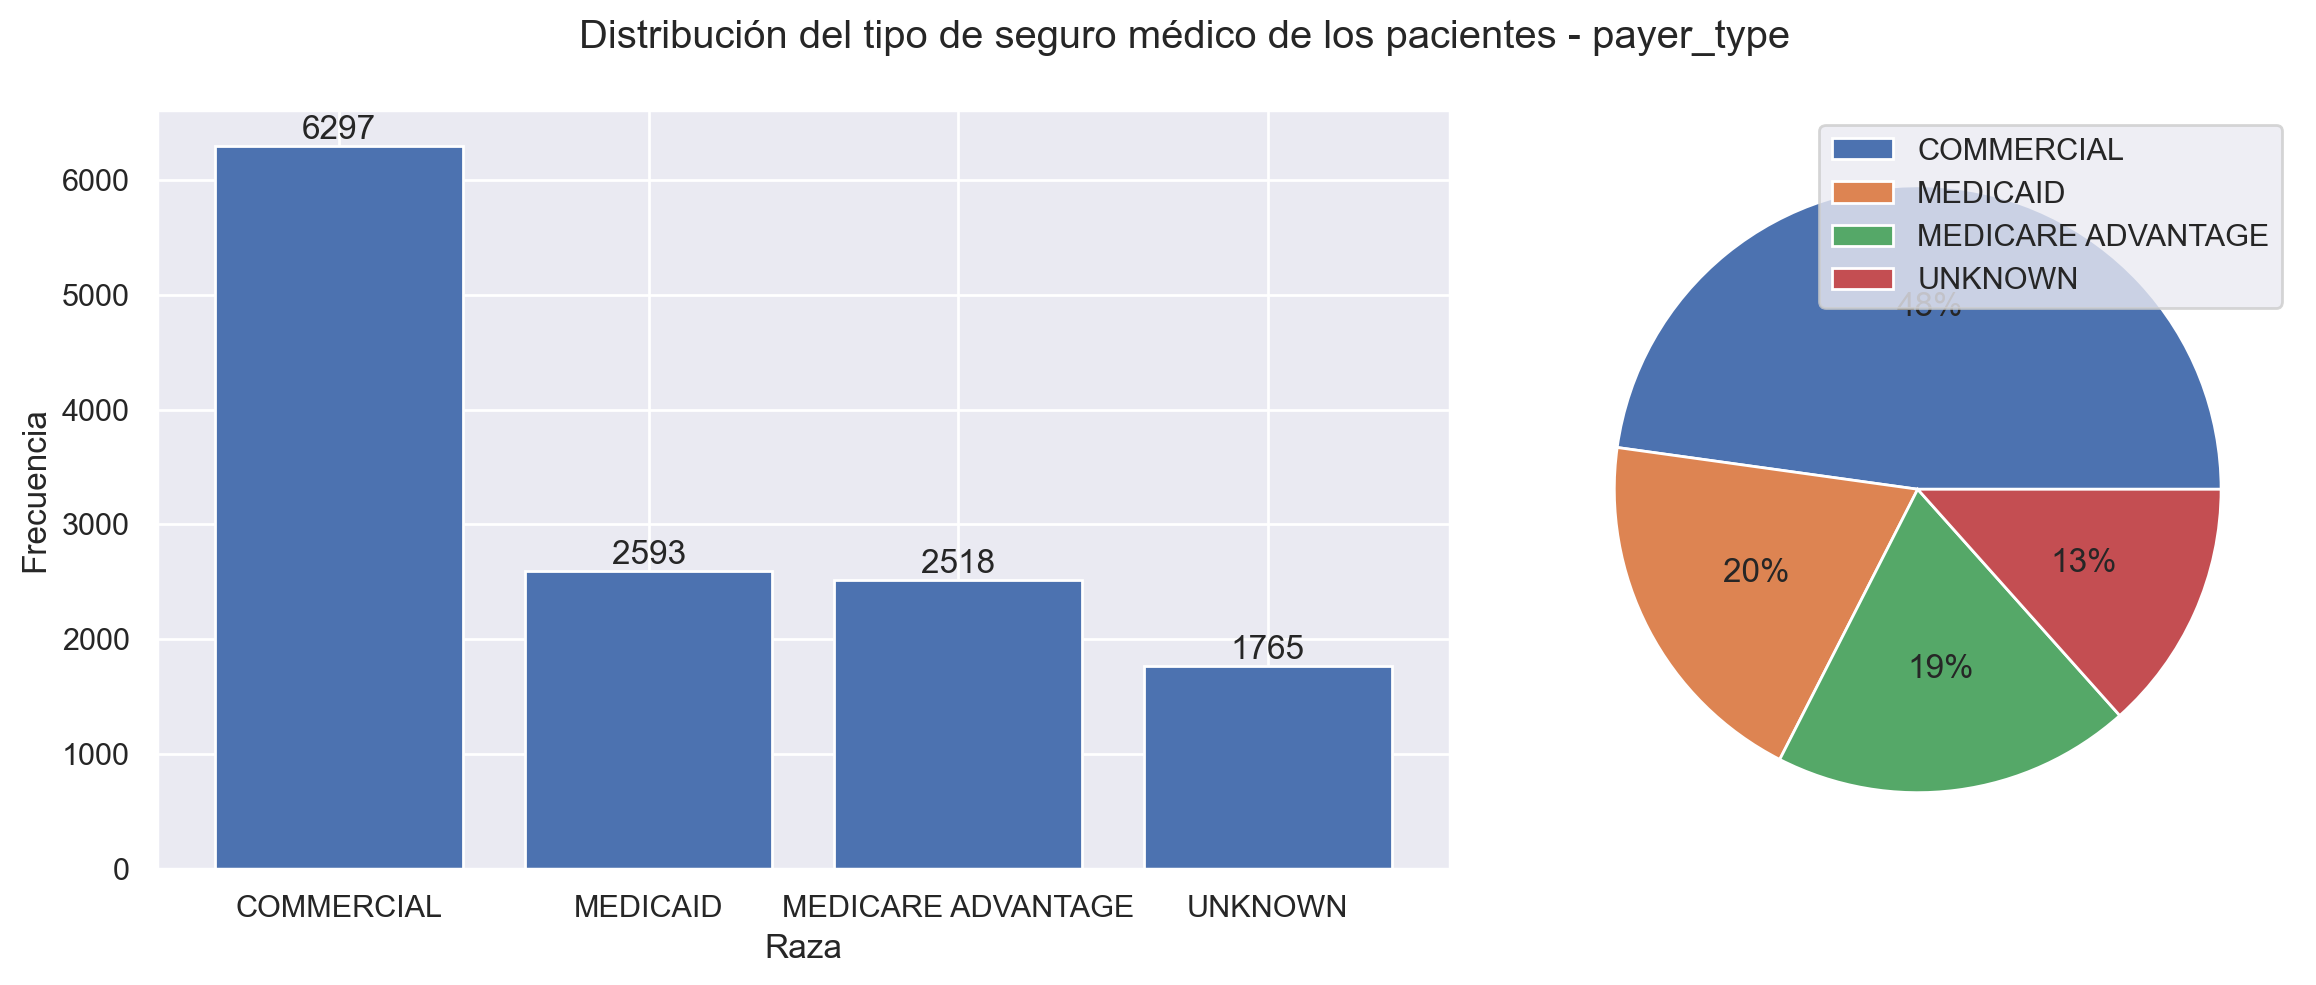

In [20]:
# Create the figure
fig, axs = plt.subplots(1, 2, 
                        figsize=(12, 5),
                        width_ratios=[1.5, 1]);

# FIGURE 1: Bar chart
axs[0].bar(x=df_payer_type["payer_type"].value_counts().index,
           height=df_payer_type["payer_type"].value_counts());
axs[0].bar_label(axs[0].containers[0]);
axs[0].set(xlabel="Raza",
           ylabel="Frecuencia")

# FIGURE 2: Pie plot
axs[1].pie(x=df_payer_type["payer_type"].value_counts(),
           autopct="%1.f%%");
axs[1].legend(df_payer_type["payer_type"].value_counts().index);

# Add a title to the figure
fig.suptitle("Distribución del tipo de seguro médico de los pacientes - payer_type")

# Show the figure
plt.tight_layout();
plt.show();

- Los seguros comerciales (**privados**) preponderan, siendo un número **mayor que si se suman el resto de tipos de seguros conocidos**.
- Los seguros **publicos** (*Medicaid* y *Medicare Advantage*) tienen aproximadamente la misma cantidad de pacientes entre sí.
- El número de personas con seguros desconocidos es más reducido al resto de valores. Esto puede referirse a personas **sin seguro** o cuyo seguro no está registrado.

Estudiando como se relaciona esta distribución con la variable objetivo:

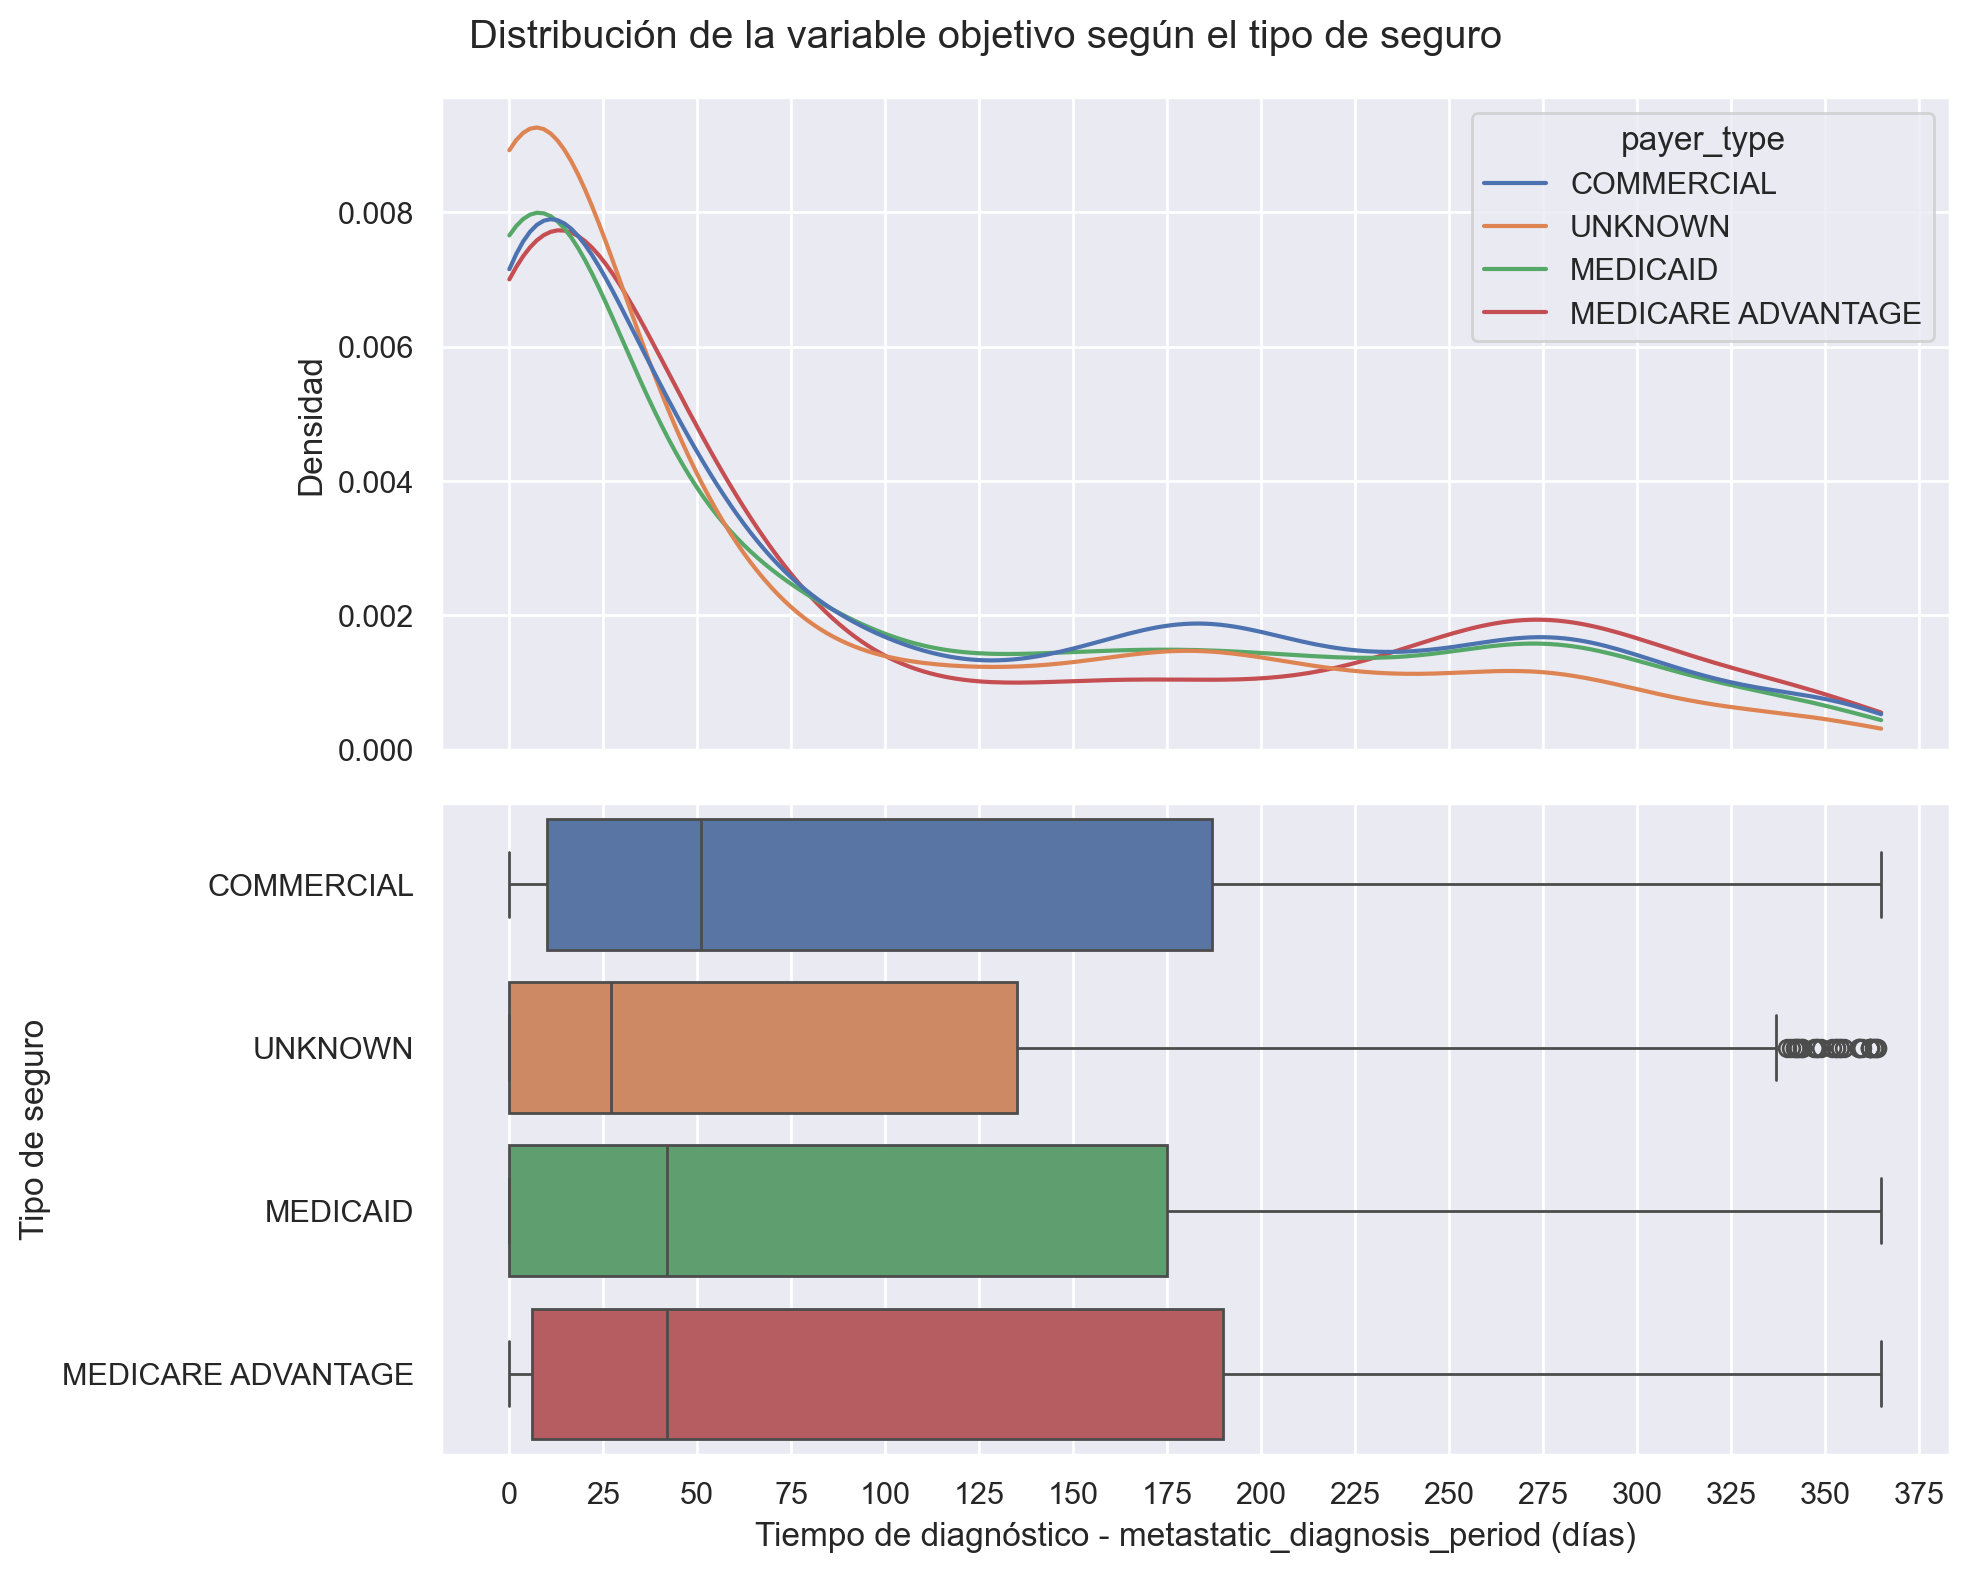

In [21]:
# Create the figures - sharing an X axis
fig, axs = plt.subplots(2, 1, 
                        figsize=(10, 8),
                        sharex=True);


# FIGURE 1 - KDE plot (density distribution)
sns.kdeplot(
    data=df_payer_type,
    x="metastatic_diagnosis_period",
    hue="payer_type",
    common_norm=False,
    clip=(0, df_payer_type["metastatic_diagnosis_period"].max()),
    ax=axs[0]
);
axs[0].set(ylabel="Densidad")

# FIGURE 2 - Box plot (distribution of values)
sns.boxplot(
    data=df_payer_type,
    y="payer_type",
    hue="payer_type",
    x="metastatic_diagnosis_period",
    ax=axs[1]
);
axs[1].set(ylabel="Tipo de seguro",
           xlabel="Tiempo de diagnóstico - metastatic_diagnosis_period (días)")
axs[1].set_xticks(range(0, 400, 25));

# Add a title to the figure
plt.suptitle("Distribución de la variable objetivo según el tipo de seguro")

# Show the figure
plt.tight_layout();
plt.show();

- En contra de lo que se podría esperar, **los seguros privados (*COMMERCIAL*) tienen el mayor tiempo de diagnóstico en promedio** - alrededor de los 50 días.
- Los dos seguros públicos (*MEDICAID* y *MEDICARE ADVANTAGE*) tienen **tiempos promedios inferiores y muy similares entre sí** - si bien parece que **el rango de tiempos de *MEDICAID* es inferior**.
- Sorprendentemente, **los casos de seguro desconocido tienen, con diferencia, el menor tiempo promedio de diagnóstico** - muy cercano a los 25 días.

Se puede comprobar también mediante tests si **existe una diferencia estadísticamente significativa** en el tiempo de diagnóstico dependiendo del tipo de seguro. Para esto, se plantea un **test de hipótesis** con un **nivel de significación del 95%** ($\alpha=0.05$):

- $H_0$: La media del tiempo de diagnóstico es igual para todas los tipos de seguro.
- $H_1$: La media del tiempo de diagnóstico es **distinta** en algun tipo de seguro.

In [22]:
# ANOVA (parametric test)
payer_type_anova = f_oneway(*[df_payer_type[df_payer_type["payer_type"]==payer_type]["metastatic_diagnosis_period"].to_list() for payer_type in df_payer_type["payer_type"].unique()])

# Kruskal-Wallis (non-parametric)
payer_type_kruskal = kruskal(*[df_payer_type[df_payer_type["payer_type"]==payer_type]["metastatic_diagnosis_period"].to_list() for payer_type in df_payer_type["payer_type"].unique()])

categorical_p_values["payer_type"] = {
    "anova": payer_type_anova[1],
    "kruskal": payer_type_kruskal[1]
}

print("P-Valores:")
print(f"\t- ANOVA: {categorical_p_values['payer_type']['anova']}")
print(f"\t- Kruskal-Wallis: {categorical_p_values['payer_type']['kruskal']}")

P-Valores:
	- ANOVA: 6.4816983897144135e-18
	- Kruskal-Wallis: 2.300180608400759e-32


Vistos los valores de $p$, se puede **rechazar la hipótesis nula** y afirmar que **existen diferencias en el valor promedio dependiendo del tipo de seguro**.

Ahora bien, es posible que este test esté sesgado por la presencia de los valores desconocidos, con un valor promedio notablemente más bajo. Si se repite el test ignorando dichos valores:

In [23]:
# ANOVA (parametric test)
payer_type_anova_no_unknown = f_oneway(*[df_payer_type[df_payer_type["payer_type"]==payer_type]["metastatic_diagnosis_period"].to_list() 
                              for payer_type in df_payer_type["payer_type"].unique() if payer_type != "UNKNOWN"])

# Kruskal-Wallis (non-parametric)
payer_type_kruskal_no_unknown = kruskal(*[df_payer_type[df_payer_type["payer_type"]==payer_type]["metastatic_diagnosis_period"].to_list() 
                               for payer_type in df_payer_type["payer_type"].unique() if payer_type != "UNKNOWN"])

categorical_p_values["payer_type_no_unknown"] = {
    "anova": payer_type_anova_no_unknown[1],
    "kruskal": payer_type_kruskal_no_unknown[1]
}

print("P-Valores (sin valores desconocidos):")
print(f"\t- ANOVA: {categorical_p_values['payer_type_no_unknown']['anova']}")
print(f"\t- Kruskal-Wallis: {categorical_p_values['payer_type_no_unknown']['kruskal']}")

P-Valores (sin valores desconocidos):
	- ANOVA: 0.0021062491032527927
	- Kruskal-Wallis: 1.2024967359448112e-08


De nuevo, observando los valores de $p$ se puede **rechazar la hipótesis nula** y afirmar que **existen diferencias en el valor promedio dependiendo del tipo de seguro**. Ahora bien, se puede ver también en este caso que **la diferencia es menos significativa** por varios ordenes de magnitud.

Por tanto, el tipo de seguro médico **también parece un atributo relevante** a la hora de estimar el valor de la variable objetivo.

### - **Códigos de diagnóstico del cancer original (`breast_cancer_diagnosis_code`, `breast_cancer_diagnosis_desc`)**

En el caso de estos dos atributos, por su definición **sus valores deberían estar asociados** - un **código** debería tener siempre la misma **descripción** del tipo de cancer original. 

El primer paso es confirmar esta restricción, y observar el **número de valores únicos**:

In [24]:
df_breast_cancer_diagnosis = df_metastasis[["breast_cancer_diagnosis_code", "breast_cancer_diagnosis_desc", "metastatic_diagnosis_period"]]

# Check if any code has extra descriptions, or viceversa
print("Códigos con más de una descripción:")
print((df_breast_cancer_diagnosis.groupby("breast_cancer_diagnosis_code")["breast_cancer_diagnosis_desc"].nunique() > 2).sum())

print("Descripciones con más de un código:")
print((df_breast_cancer_diagnosis.groupby("breast_cancer_diagnosis_desc")["breast_cancer_diagnosis_code"].nunique() > 2).sum())

# Check the number of pairs
print(f"\nNúmero de valores únicos: {df_breast_cancer_diagnosis['breast_cancer_diagnosis_code'].nunique()}")

Códigos con más de una descripción:
0
Descripciones con más de un código:
0

Número de valores únicos: 47


**47 códigos** es un número de valores únicos muy elevados. Además, existe la posibilidad de que **los 47 códigos no sean exhaustivos** - puede que se utilicen más codigos que no estén presentes en el conjunto de entrenamiento, lo que puede causar problemas durante el resto del proceso.

Si bien se puede ver representado en un gráfico de barras para comprobar como se distribuye la propia variable, resulta más interesante observar los **códigos y sus descripciones** en forma de lista:

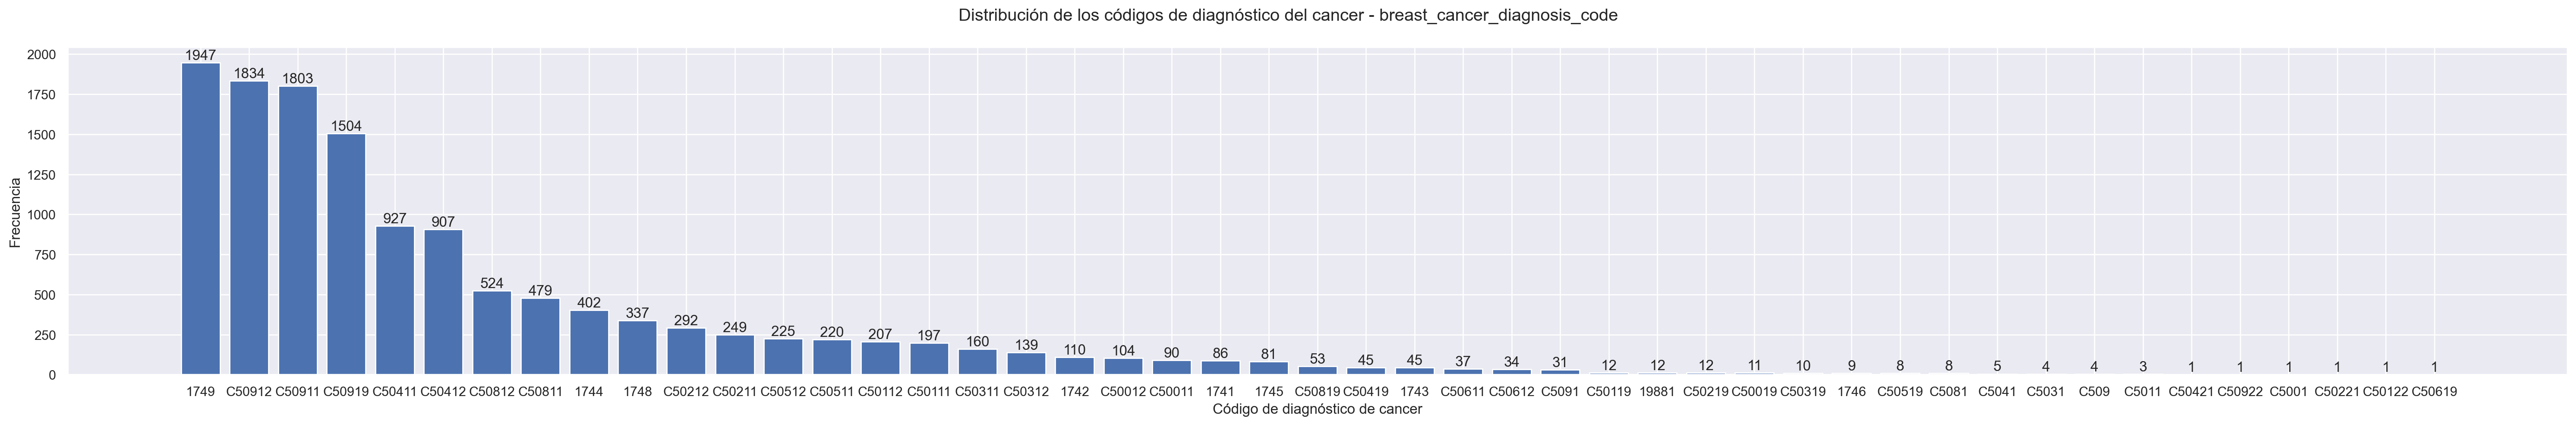

In [25]:
# Create the figure
fig = plt.figure(figsize=(30, 5));

# Create the barchart
plt.bar(x=df_breast_cancer_diagnosis["breast_cancer_diagnosis_code"].value_counts().index,
        height=df_breast_cancer_diagnosis["breast_cancer_diagnosis_code"].value_counts());
plt.bar_label(fig.gca().containers[0]);
plt.xlabel("Código de diagnóstico de cancer");
plt.ylabel("Frecuencia");
plt.suptitle("Distribución de los códigos de diagnóstico del cancer - breast_cancer_diagnosis_code");

# Show the figure
plt.tight_layout();
plt.show();

In [26]:
# Display the list of cancers
display(df_breast_cancer_diagnosis[["breast_cancer_diagnosis_code", "breast_cancer_diagnosis_desc"]].value_counts())

breast_cancer_diagnosis_code  breast_cancer_diagnosis_desc                                
1749                          Malignant neoplasm of breast (female), unspecified              1947
C50912                        Malignant neoplasm of unspecified site of left female breast    1834
C50911                        Malignant neoplasm of unsp site of right female breast          1803
C50919                        Malignant neoplasm of unsp site of unspecified female breast    1504
C50411                        Malig neoplm of upper-outer quadrant of right female breast      927
C50412                        Malig neoplasm of upper-outer quadrant of left female breast     907
C50812                        Malignant neoplasm of ovrlp sites of left female breast          524
C50811                        Malignant neoplasm of ovrlp sites of right female breast         479
1744                          Malignant neoplasm of upper-outer quadrant of female breast      402
1748              

Se observa que todos los códigos hacen referencias a **cánceres de mama**. Más concretamente:
- Los cuatro grupos más diagnosticados, con una diferencia sustancial, están relacionados con **cánceres en sitios sin especificar** - ya sea sin especificar la región o el pecho. Es coherente que estos sean los más frecuentes, al ser una categoría "genérica".
- Dentro de los cánceres "específicos", los más frecuentes se encuentran en **las regiones superiores** (`C50411` y `C50412`)
- Existen códigos más antiguos (empezando sin **C**) que representan otras categorías ya existentes - estos códigos se corresponden a **versiones más antiguas del estandar**.


Curiosamente, se observa que existen **cuatro instancias asociadas a hombres**. Si bien esto es una posibilidad, si se comprueban todos los atributos para dichas instancias:

In [27]:
df_metastasis[df_metastasis["breast_cancer_diagnosis_desc"].str.contains(r" male")]

,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,...,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
patient_id,,,,,,,,,,,,,,,,,,,,,
133511,NaN,COMMERCIAL,PA,173,Northeast,Middle Atlantic,45,F,NaN,C50421,...,47.55,66.70,70.40,75.45,75.67,69.69,56.51,40.45,36.92,7
141903,Other,MEDICAID,FL,330,South,South Atlantic,66,F,24.0,C50922,...,76.01,78.16,82.28,83.48,83.44,82.73,80.93,75.81,70.69,58
119773,NaN,NaN,CA,900,West,Pacific,53,F,NaN,C50221,...,63.34,63.10,67.45,75.86,75.24,71.10,68.95,65.46,59.46,93
222796,White,MEDICAID,CA,913,West,Pacific,49,F,NaN,C50122,...,63.25,64.01,69.54,78.40,76.72,72.64,68.64,64.03,57.70,256


Pese al código de diagnóstico indicando que los pacientes son hombres, los datos indican que los pacientes **son mujeres**. Si bien sería posible reemplazar el género de estas cuatro instancias, como se verá después, **todas las instancias tienen género femenino** - por lo que añadir estas cuatro instancias no sería util. Por tanto, se **reemplazarán los códigos de paciente a su equivalente femenino**.

Al haber gran cantidad de posibles valores de los atributos, se considerarán solo los **diez códigos más frecuentes** para el estudio de la relación con la variable objetivo:

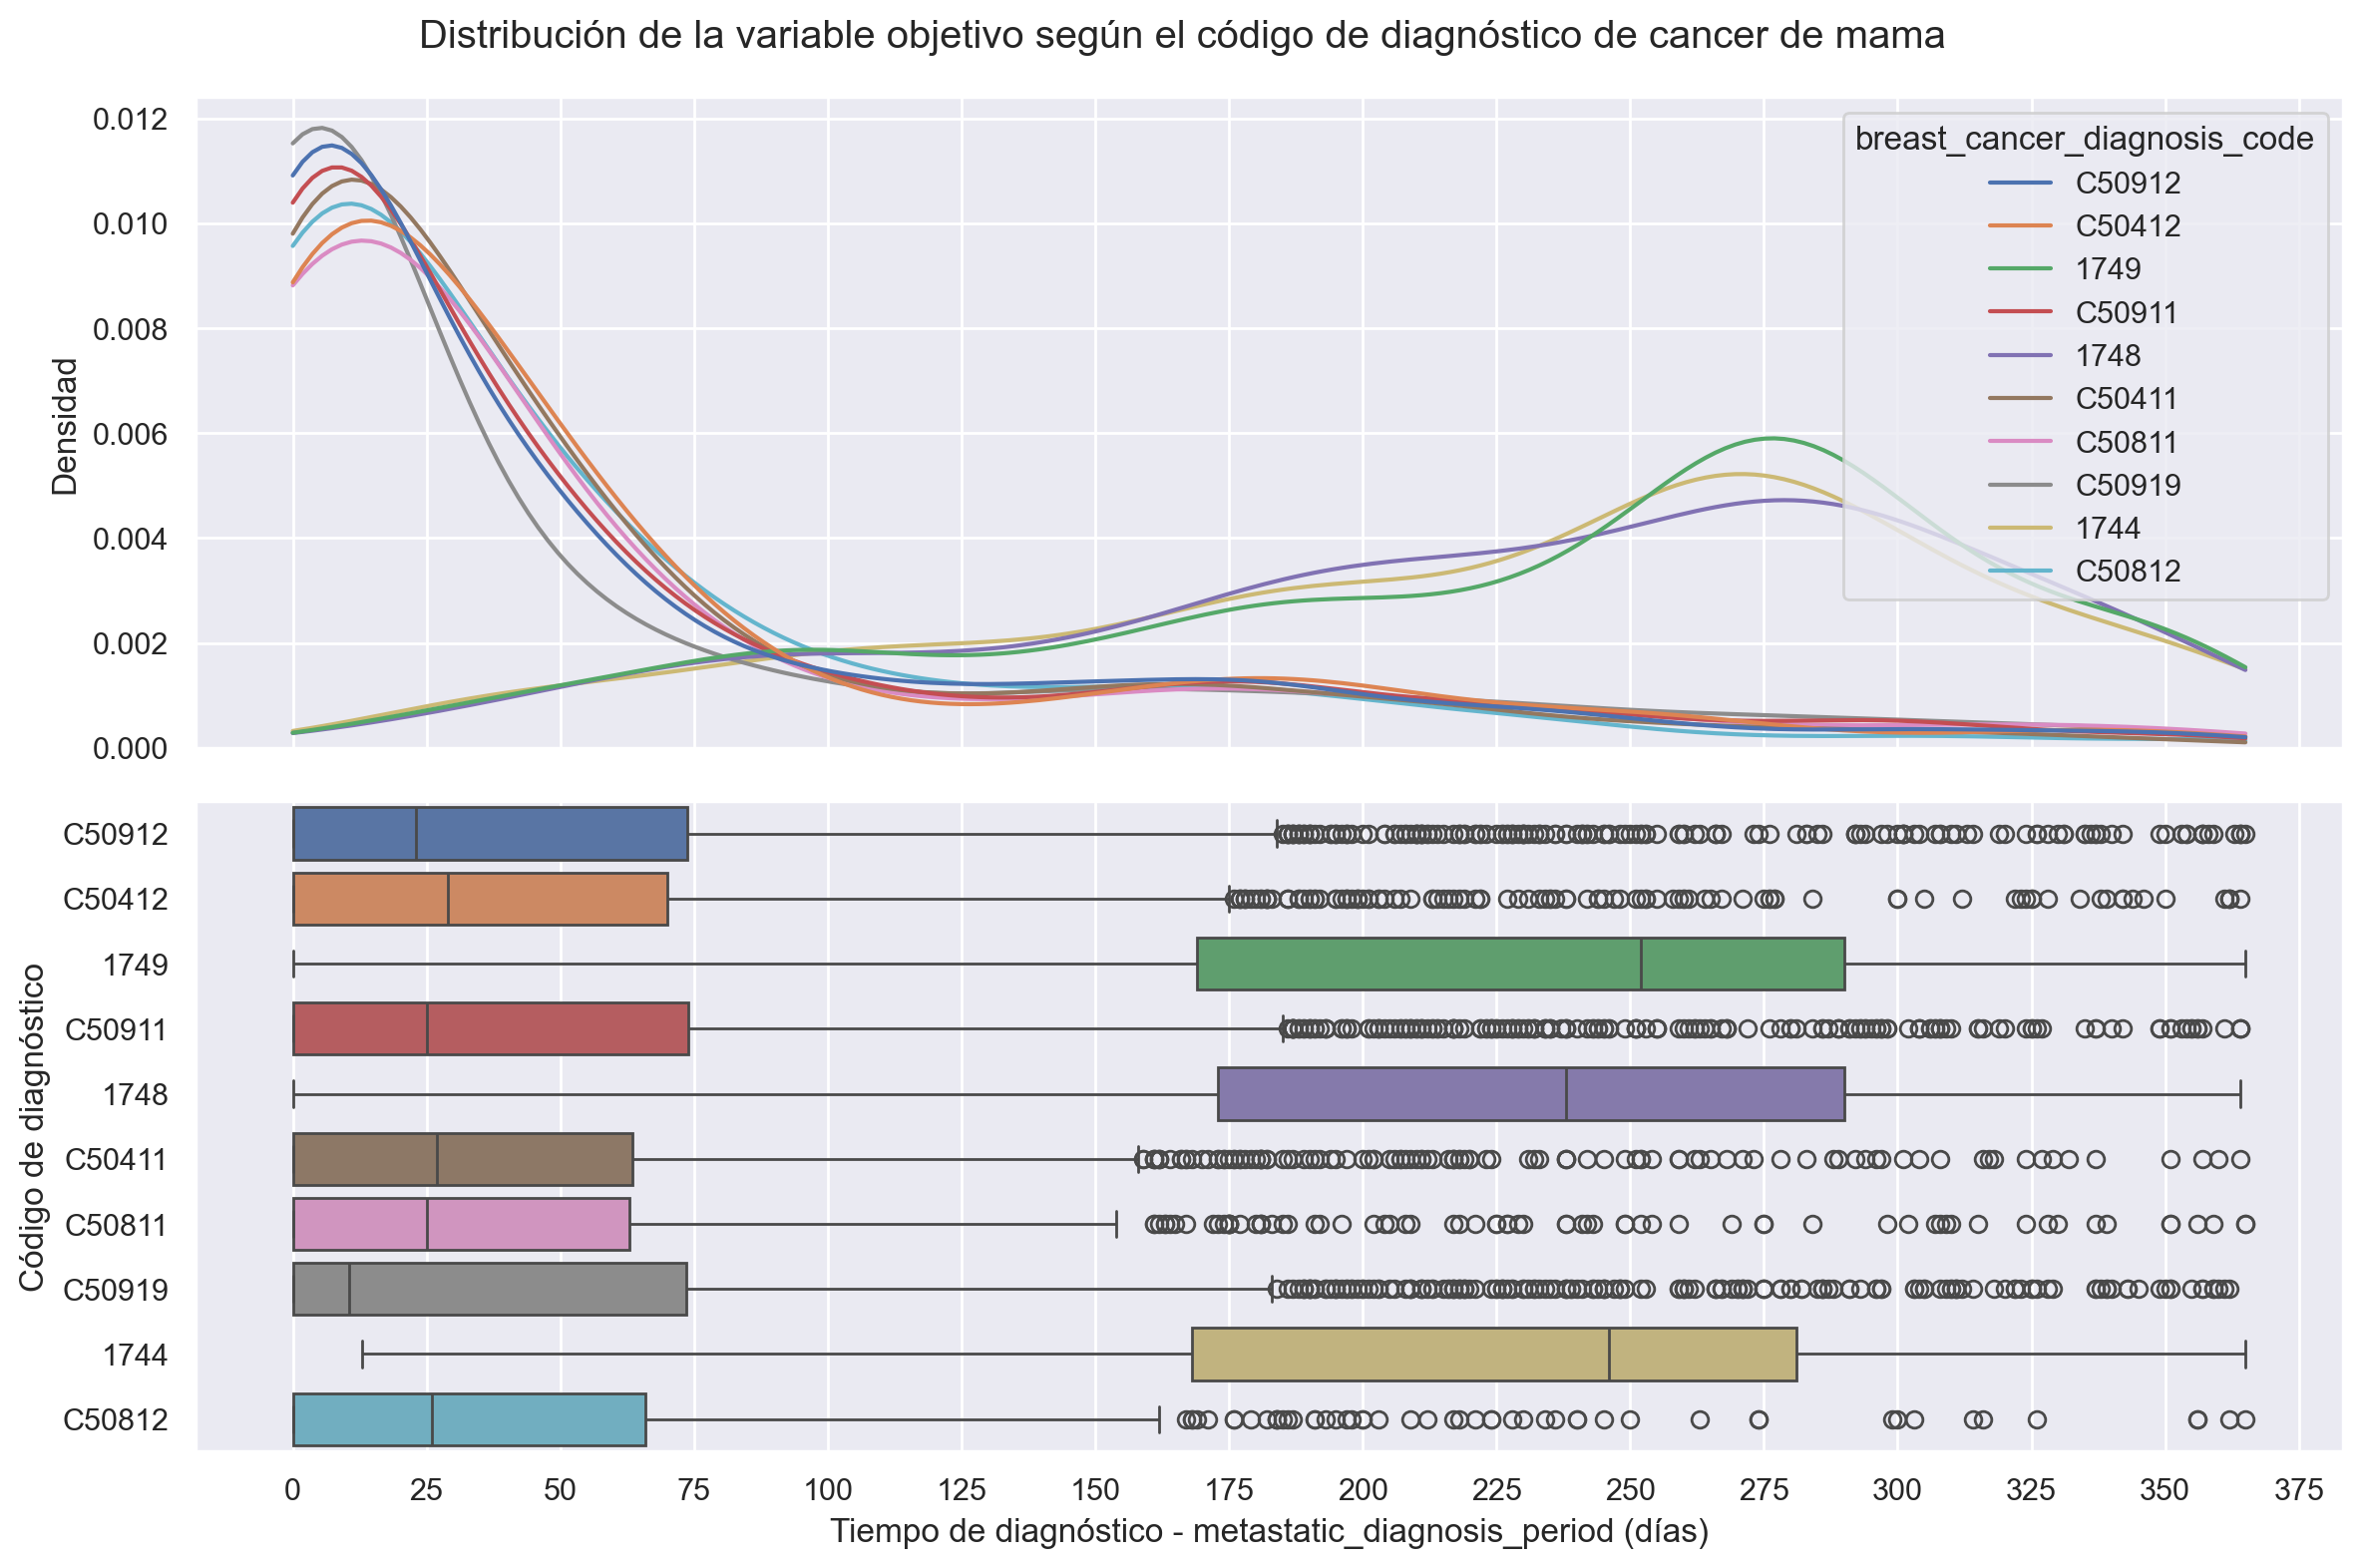

In [28]:
# Create the figures - sharing an X axis
fig, axs = plt.subplots(2, 1, 
                        figsize=(12, 8),
                        sharex=True);


# FIGURE 1 - KDE plot (density distribution)
sns.kdeplot(
    data=df_breast_cancer_diagnosis[df_breast_cancer_diagnosis["breast_cancer_diagnosis_code"].isin(df_breast_cancer_diagnosis["breast_cancer_diagnosis_code"].value_counts().nlargest(10).index)],
    x="metastatic_diagnosis_period",
    hue="breast_cancer_diagnosis_code",
    common_norm=False,
    clip=(0, df_payer_type["metastatic_diagnosis_period"].max()),
    ax=axs[0]
);
axs[0].set(ylabel="Densidad")

# FIGURE 2 - Box plot (distribution of values)
sns.boxplot(
    data=df_breast_cancer_diagnosis[df_breast_cancer_diagnosis["breast_cancer_diagnosis_code"].isin(df_breast_cancer_diagnosis["breast_cancer_diagnosis_code"].value_counts().nlargest(10).index)],
    y="breast_cancer_diagnosis_code",
    hue="breast_cancer_diagnosis_code",
    x="metastatic_diagnosis_period",
    ax=axs[1]
);
axs[1].set(ylabel="Código de diagnóstico",
           xlabel="Tiempo de diagnóstico - metastatic_diagnosis_period (días)")
axs[1].set_xticks(range(0, 400, 25));

# Add a title to the figure
plt.suptitle("Distribución de la variable objetivo según el código de diagnóstico de cancer de mama")

# Show the figure
plt.tight_layout();
plt.show();

En esta gráfica se observa algo inesperado: si bien es cierto que la ubicación del cancer puede influir en el valor promedio del tiempo de diagnóstico, **lo que más influye es el formato usado para escribir el código**:
- Los códigos siguiendo el estandar **ICD-9** (hasta 5 cifras, sin empezar por C) tienen **tiempos de diagnóstico muy elevados en promedio**, alrededor de los 250 días.
- En cambio, los códigos siguiendo el estandar **ICD-10** (hasta 7 cifras, empezando por C) tienen **tiempos de diagnóstico mas bajos** - alrededor de los 25 días, con algunos estando más cerca de los diez días.

Si bien no hay una razón obvia para esto, se puede especular con **la fecha de los diagnósticos**: el estándar ICD-9 se dejó de utilizar en el año 1999, lo que puede significar que los casos etiquetados con este estándar son casos más antiguos - y, por ende, **se disponían de menos recursos y conocimientos para el diagnóstico de la metástasis**.

Es de interés estudiar también el comportamiento de los tipos de cancer menos frecuentes. Ahora bien, al no poder representarse adecuadamente en un diagrama de cajas, se opta por observar manualmente si existe alguna relación:

In [29]:
# Entries belonging to codes with 5 or less instances
n_entries = 5
df_breast_cancer_diagnosis_infrequent = (
    df_breast_cancer_diagnosis[df_breast_cancer_diagnosis["breast_cancer_diagnosis_code"].isin(
        df_breast_cancer_diagnosis["breast_cancer_diagnosis_code"].value_counts()[(df_breast_cancer_diagnosis["breast_cancer_diagnosis_code"].value_counts() <= n_entries)].index
    )].sort_values(by="breast_cancer_diagnosis_code")
)


print(f"Tiempo de diagnóstico promedio: {df_breast_cancer_diagnosis_infrequent['metastatic_diagnosis_period'].mean()}")
print(f"\tstd: {df_breast_cancer_diagnosis_infrequent['metastatic_diagnosis_period'].std()}")
display((
    df_breast_cancer_diagnosis_infrequent.groupby(["breast_cancer_diagnosis_code", "breast_cancer_diagnosis_desc"]).agg({"metastatic_diagnosis_period": ["count", "mean", "std"]})
))

Tiempo de diagnóstico promedio: 72.77272727272727
	std: 86.31886171310352


metastatic_diagnosis_period  \
                                                                                                      count   
breast_cancer_diagnosis_code breast_cancer_diagnosis_desc                                                     
C5001                        Malignant neoplasm of nipple and areola, female                              1   
C5011                        Malignant neoplasm of central portion of breast...                           3   
C50122                       Malignant neoplasm of central portion of left m...                           1   
C50221                       Malig neoplasm of upper-inner quadrant of right...                           1   
C5031                        Malignant neoplasm of lower-inner quadrant of b...                           4   
C5041                        Malignant neoplasm of upper-outer quadrant of b...                           5   
C50421                       Malig neoplasm of upper-outer quadrant of right...                           1   
C50619                       Malignant neoplasm of axillary tail of unsp fem...                           1   
C509                         Malignant neoplasm of breast of unspecified site                             4   
C50922                       Malignant neoplasm of unspecified site of left ...                           1   

                                                                                             \
                                                                                       mean   
breast_cancer_diagnosis_code breast_cancer_diagnosis_desc                                     
C5001                        Malignant neoplasm of nipple and areola, female      42.000000   
C5011                        Malignant neoplasm of central portion of breast...   30.333333   
C50122                       Malignant neoplasm of central portion of left m...  256.000000   
C50221                       Malig neoplasm of upper-inner quadrant of right...   93.000000   
C5031                        Malignant neoplasm of lower-inner quadrant of b...   44.000000   
C5041                        Malignant neoplasm of upper-outer quadrant of b...   56.800000   
C50421                       Malig neoplasm of upper-outer quadrant of right...    7.000000   
C50619                       Malignant neoplasm of axillary tail of unsp fem...    0.000000   
C509                         Malignant neoplasm of breast of unspecified site    148.500000   
C50922                       Malignant neoplasm of unspecified site of left ...   58.000000   

                                                                                             
                                                                                        std  
breast_cancer_diagnosis_code breast_cancer_diagnosis_desc                                    
C5001                        Malignant neoplasm of nipple and areola, female            NaN  
C5011                        Malignant neoplasm of central portion of breast...   15.307950  
C50122                       Malignant neoplasm of central portion of left m...         NaN  
C50221                       Malig neoplasm of upper-inner quadrant of right...         NaN  
C5031                        Malignant neoplasm of lower-inner quadrant of b...   44.996296  
C5041                        Malignant neoplasm of upper-outer quadrant of b...   92.893487  
C50421                       Malig neoplasm of upper-outer quadrant of right...         NaN  
C50619                       Malignant neoplasm of axillary tail of unsp fem...         NaN  
C509                         Malignant neoplasm of breast of unspecified site    112.120471  
C50922                       Malignant neoplasm of unspecified site of left ...         NaN

A simple vista, no parece haber una correlación significativa entre los distintos tipos - incluso dentro de los cánceres con más de una instancia parece haber **una gran desviación entre los valores**. 

Los valores de estas variables son **muy significativos** para la estimación posterior - pero, al representar la misma información, **es suficiente con utilizar unicamente uno de los dos atributos**.

### - **Códigos de diagnóstico de la metástasis (`metastatic_cancer_diagnosis_code`)**

En esta ocasión, no se incluye la descripción textual de cada código.

In [30]:
df_metastatic_cancer_diagnosis = df_metastasis[["metastatic_cancer_diagnosis_code", "metastatic_diagnosis_period"]]
print(f"Número de códigos: {df_metastatic_cancer_diagnosis['metastatic_cancer_diagnosis_code'].nunique()}")

Número de códigos: 43


**43 códigos** sigue siendo un número muy elevado de posibles valores para el atributo - y, de nuevo, **no es un número exhaustivo**, por lo que pueden haber posibles valores no incluidos en el conjunto de entrenamiento.

Representando la distribución de instancias según el código:

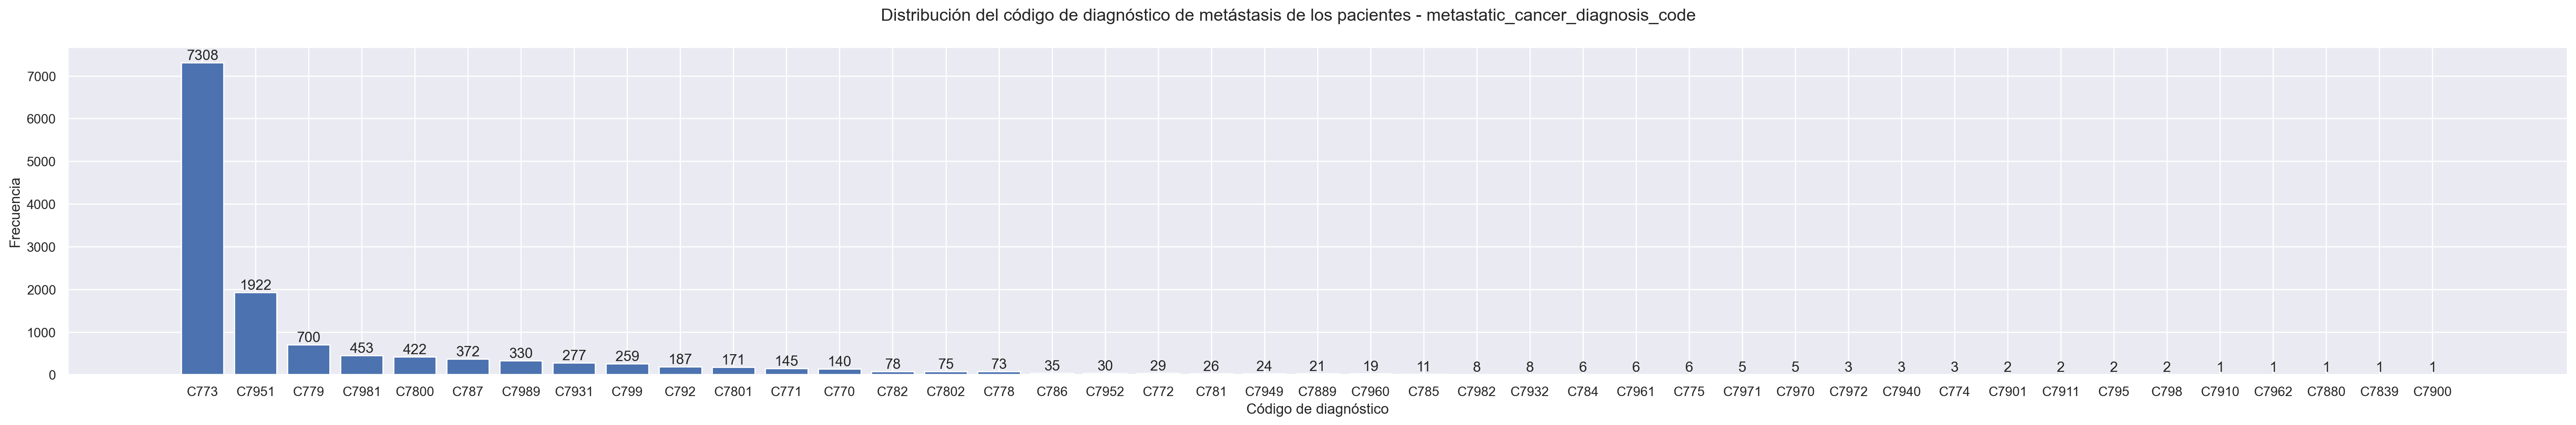

In [31]:
# Create the figure
fig = plt.figure(figsize=(30, 5));

# Create the barchart
plt.bar(x=df_metastatic_cancer_diagnosis["metastatic_cancer_diagnosis_code"].value_counts().index,
        height=df_metastatic_cancer_diagnosis["metastatic_cancer_diagnosis_code"].value_counts());
plt.bar_label(fig.gca().containers[0]);
plt.xlabel("Código de diagnóstico");
plt.ylabel("Frecuencia");
plt.suptitle("Distribución del código de diagnóstico de metástasis de los pacientes - metastatic_cancer_diagnosis_code");

# Show the figure
plt.tight_layout();
plt.show();

A diferencia del código de diagnóstico del cancer de mama, en este caso **hay un código que prepondera** respecto al resto (`C773`), aunque hay otros códigos con bastante ocurrencia.

Si se busca de forma externa el significado de los **diez códigos más frecuentes** - utilizando la web **`icd10data`** como referencia:
- `C773`: Metástasis en los **nodos linfáticos auxiliares y de las extremidades superiores**.
- `C7951`:Metástasis en los **huesos**.
- `C779`: Metástasis en **nodos linfáticos sin determinar**.
- `C7981`: Metástasis en **los pechos**.
- `C7800`: Metástasis en un **pulmón sin determinar**.
- `C787`: Metástasis en el **hígado y vesícula biliar**.
- `C7989`: Metástasis en **otra región especificada**.
- `C7931`: Metástasis en el **cerebro**.
- `C799`: Metástasis en **una zona sin especificar**.
- `C792`: Metástasis en la **piel**.

Todos los códigos utilizados hacen referencias a **neoplasmas secundarios malignos** (metástasis, en general debidas al tratamiento del cancer original). La mayoría de los casos tienen metástasis en regiones del **torso y extremidades superiores** - una evolución razonable de un cancer ubicado en las mamas.

Si se observa la distribución del tiempo de diagnóstico en base a estos códigos, fijandonos en los **diez códigos más frecuentes**:

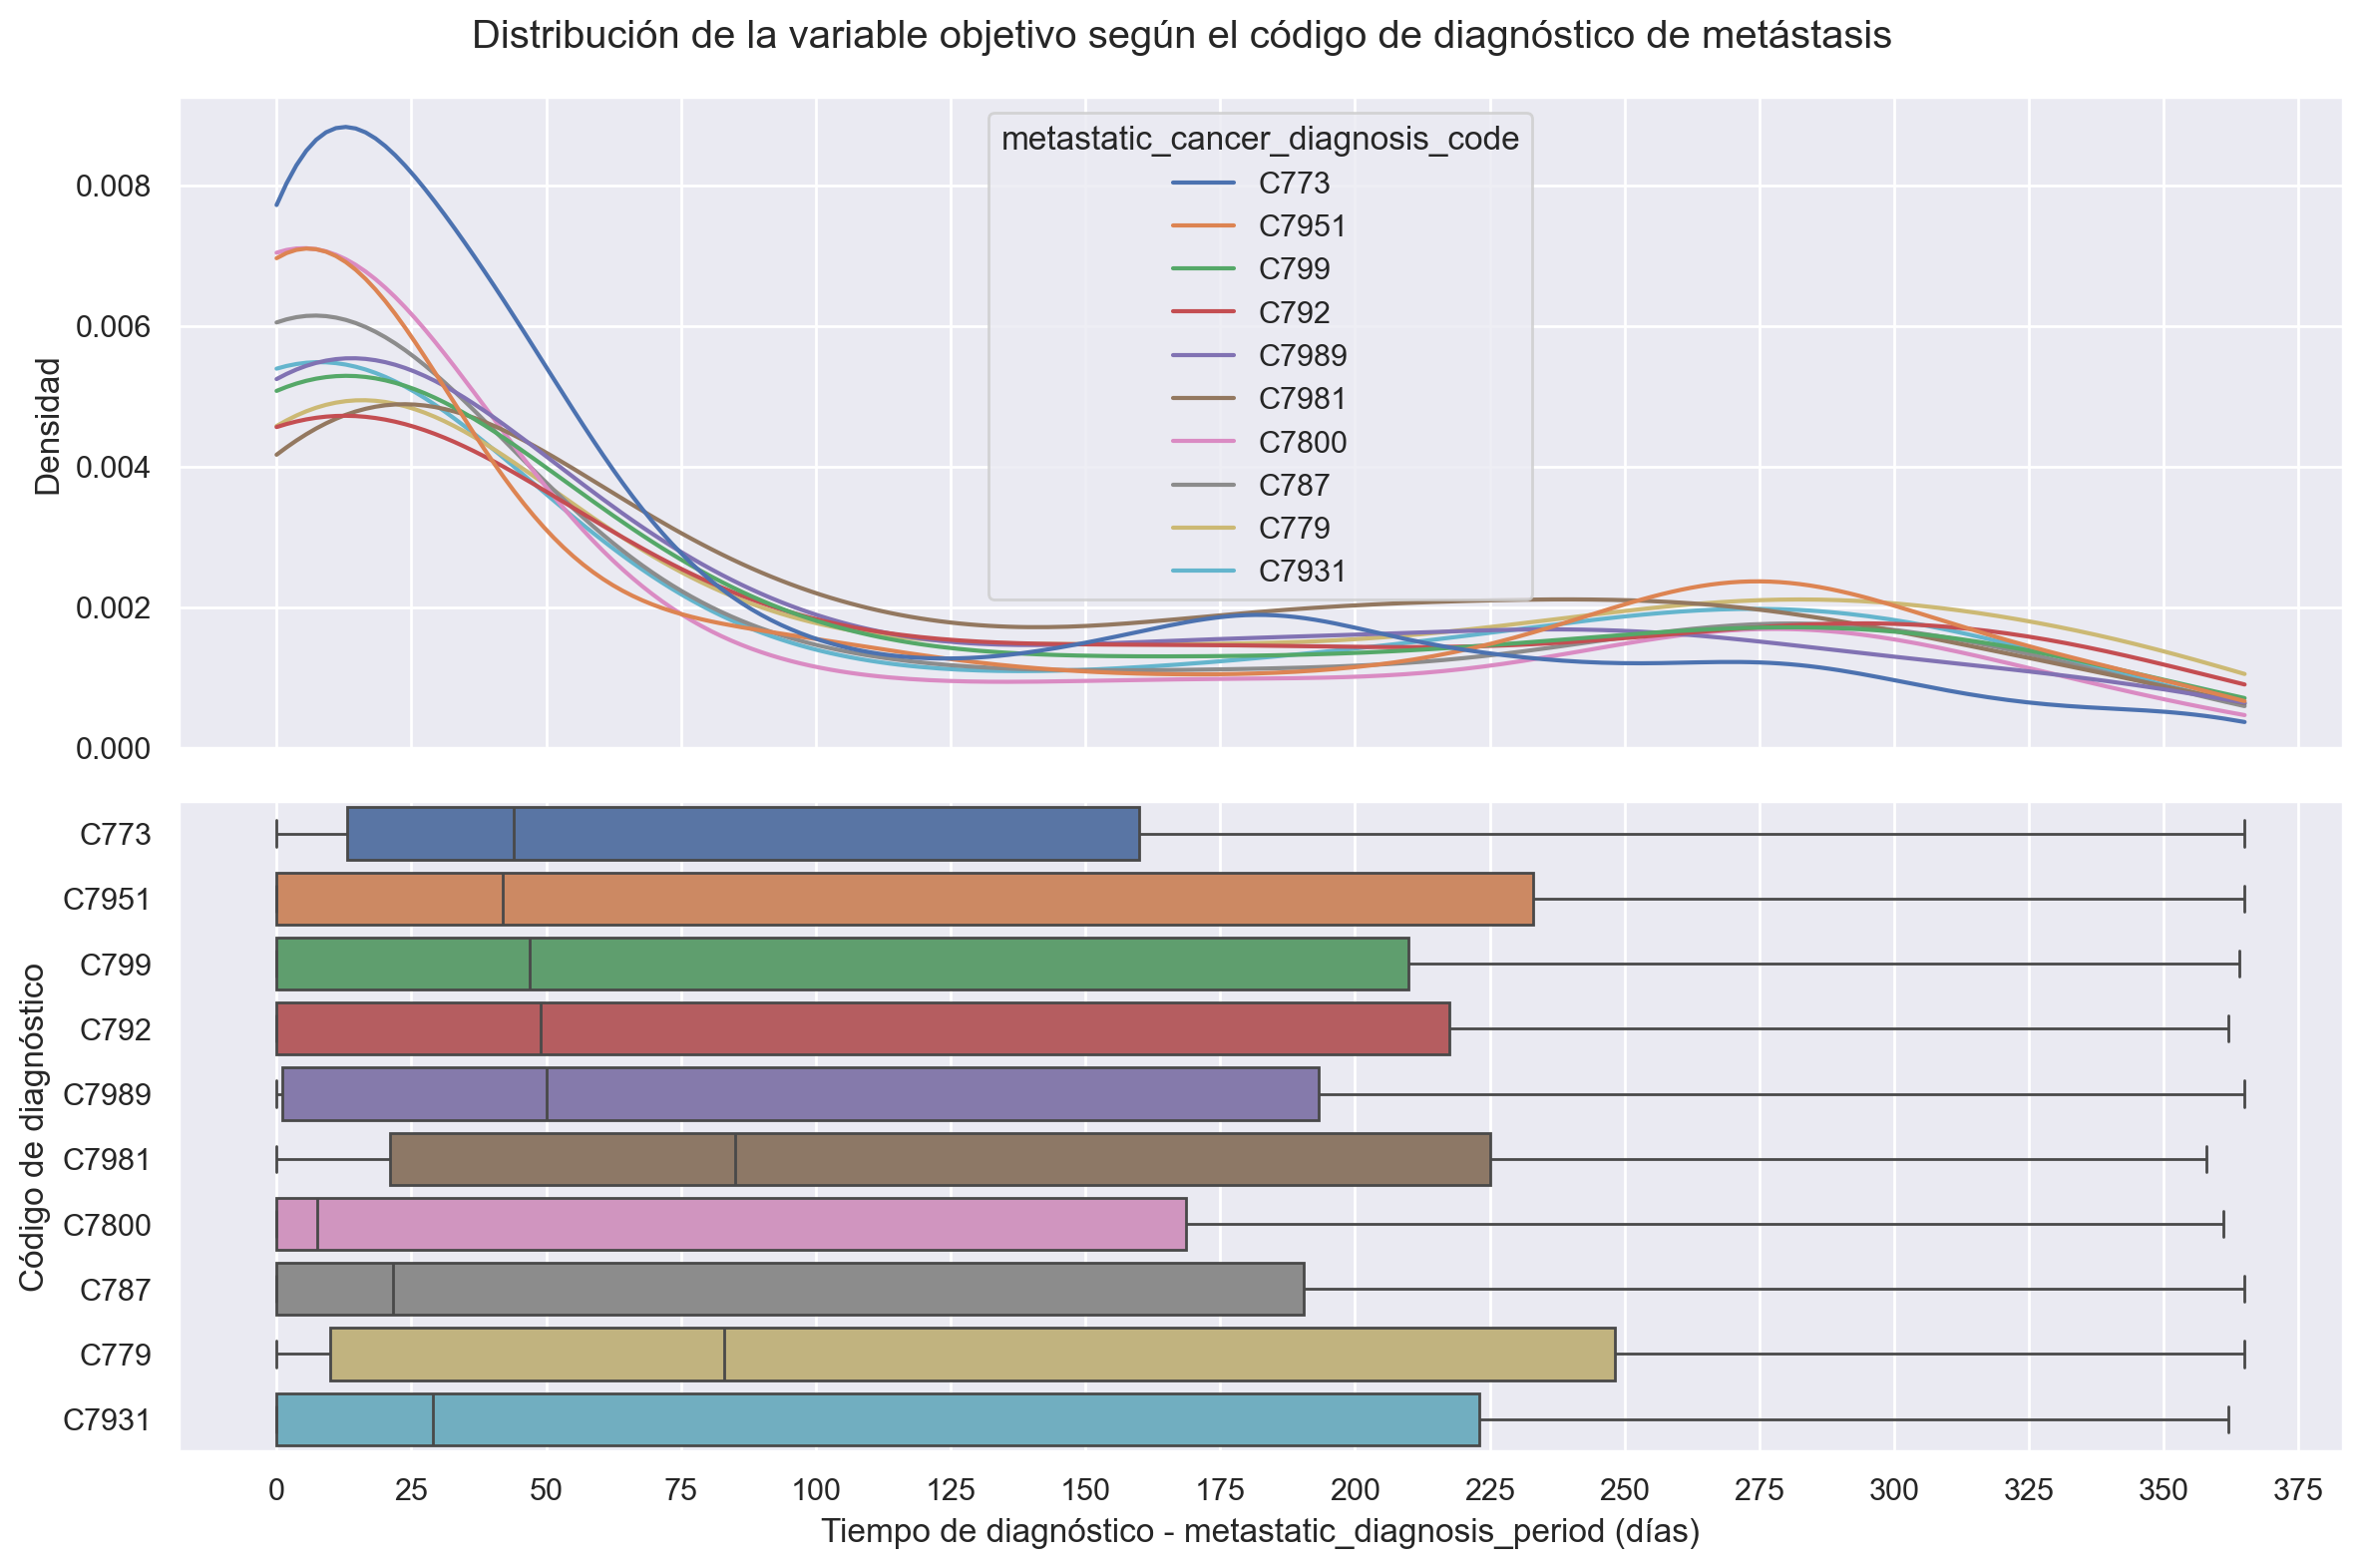

In [32]:
# Create the figures - sharing an X axis
fig, axs = plt.subplots(2, 1, 
                        figsize=(12, 8),
                        sharex=True);


# FIGURE 1 - KDE plot (density distribution)
sns.kdeplot(
    data=df_metastatic_cancer_diagnosis[df_metastatic_cancer_diagnosis["metastatic_cancer_diagnosis_code"].isin(df_metastatic_cancer_diagnosis["metastatic_cancer_diagnosis_code"].value_counts().nlargest(10).index)],
    x="metastatic_diagnosis_period",
    hue="metastatic_cancer_diagnosis_code",
    common_norm=False,
    clip=(0, df_payer_type["metastatic_diagnosis_period"].max()),
    ax=axs[0]
);
axs[0].set(ylabel="Densidad")

# FIGURE 2 - Box plot (distribution of values)
sns.boxplot(
    data=df_metastatic_cancer_diagnosis[df_metastatic_cancer_diagnosis["metastatic_cancer_diagnosis_code"].isin(df_metastatic_cancer_diagnosis["metastatic_cancer_diagnosis_code"].value_counts().nlargest(10).index)],
    y="metastatic_cancer_diagnosis_code",
    hue="metastatic_cancer_diagnosis_code",
    x="metastatic_diagnosis_period",
    ax=axs[1]
);
axs[1].set(ylabel="Código de diagnóstico",
           xlabel="Tiempo de diagnóstico - metastatic_diagnosis_period (días)")
axs[1].set_xticks(range(0, 400, 25));

# Add a title to the figure
plt.suptitle("Distribución de la variable objetivo según el código de diagnóstico de metástasis")

# Show the figure
plt.tight_layout();
plt.show();

Si bien es cierto que la diferencia no es tan pronunciada como en el caso del código de diagnóstico original, **el código de diagnóstico de la metástasis** - y, por ende, el tipo de metástasis - parece afectar sustancialmente a la distribución de los tiempos de diagnóstico. 

Ahora bien, no parece haber una correlación clara entre la ubicación de la metástasis y el tiempo de diagnóstico. Como ejemplo, las metástasis que más tiempo se tarda en diagnosticar en promedio son las metástasis en **las mamas** (`C79.81`) y **en nodos linfáticos indeterminados** (`C77.9`) - mientras que las metástasis en los nodos linfáticos superiores (`C77.3`), una región aparentemente cercana, tienen un tiempo de diagnóstico notablemente inferior.

Una vez más, es de interés estudiar también el comportamiento de los tipos de metástasis menos frecuentes. Ahora bien, al no poder representarse adecuadamente en un diagrama de cajas, se opta por observar manualmente si existe alguna relación:

In [33]:
# Entries belonging to codes with 5 or less instances
n_entries = 5
df_metastatic_cancer_diagnosis_infrequent = (
    df_metastatic_cancer_diagnosis[df_metastatic_cancer_diagnosis["metastatic_cancer_diagnosis_code"].isin(
        df_metastatic_cancer_diagnosis["metastatic_cancer_diagnosis_code"].value_counts()[(df_metastatic_cancer_diagnosis["metastatic_cancer_diagnosis_code"].value_counts() <= n_entries)].index
    )].sort_values(by="metastatic_cancer_diagnosis_code")
)


print(f"Tiempo de diagnóstico promedio: {df_metastatic_cancer_diagnosis_infrequent['metastatic_diagnosis_period'].mean()}")
print(f"\tstd: {df_metastatic_cancer_diagnosis_infrequent['metastatic_diagnosis_period'].std()}")
display((
    df_metastatic_cancer_diagnosis_infrequent.groupby("metastatic_cancer_diagnosis_code").agg({"metastatic_diagnosis_period": ["count", "mean", "std"]})
))

Tiempo de diagnóstico promedio: 84.0625
	std: 108.54936070598214


metastatic_diagnosis_period              \
                                                       count        mean   
metastatic_cancer_diagnosis_code                                           
C774                                                       3  102.000000   
C7839                                                      1   27.000000   
C7880                                                      1    0.000000   
C7900                                                      1    0.000000   
C7901                                                      2  199.500000   
C7910                                                      1    0.000000   
C7911                                                      2  151.000000   
C7940                                                      3  106.333333   
C795                                                       2  150.000000   
C7962                                                      1  165.000000   
C7970                                                      5   88.200000   
C7971                                                      5   39.600000   
C7972                                                      3   34.666667   
C798                                                       2   64.500000   

                                              
                                         std  
metastatic_cancer_diagnosis_code              
C774                               45.310043  
C7839                                    NaN  
C7880                                    NaN  
C7900                                    NaN  
C7901                             214.253355  
C7910                                    NaN  
C7911                             181.019336  
C7940                             178.146943  
C795                              212.132034  
C7962                                    NaN  
C7970                             121.982376  
C7971                              62.199678  
C7972                              28.095077  
C798                               40.305087

A simple vista, no parece haber una correlación significativa entre los distintos tipos - incluso dentro de las metástasis con más de una instancia parece haber **una gran desviación entre los valores**. 

Se puede comprobar también mediante tests si **existe una diferencia estadísticamente significativa** en el tiempo de diagnóstico dependiendo del tipo de metástasis. Para esto, se plantea un **test de hipótesis** con un **nivel de significación del 95%** ($\alpha=0.05$):

- $H_0$: La media del tiempo de diagnóstico es igual para todos los tipos de metástasis.
- $H_1$: La media del tiempo de diagnóstico es **distinta** en alguno de los tipos.

In [34]:
# ANOVA (parametric test)
metastatic_cancer_diagnosis_anova = f_oneway(*[df_metastatic_cancer_diagnosis[df_metastatic_cancer_diagnosis["metastatic_cancer_diagnosis_code"]==metastatic_type]["metastatic_diagnosis_period"].to_list() 
                              for metastatic_type in df_metastatic_cancer_diagnosis["metastatic_cancer_diagnosis_code"].unique()])

# Kruskal-Wallis (non-parametric)
metastatic_cancer_diagnosis_kruskal = kruskal(*[df_metastatic_cancer_diagnosis[df_metastatic_cancer_diagnosis["metastatic_cancer_diagnosis_code"]==metastatic_type]["metastatic_diagnosis_period"].to_list() 
                              for metastatic_type in df_metastatic_cancer_diagnosis["metastatic_cancer_diagnosis_code"].unique()])

categorical_p_values["metastatic_cancer_diagnosis"] = {
    "anova": metastatic_cancer_diagnosis_anova[1],
    "kruskal": metastatic_cancer_diagnosis_kruskal[1]
}

print("P-Valores:")
print(f"\t- ANOVA: {categorical_p_values['metastatic_cancer_diagnosis']['anova']}")
print(f"\t- Kruskal-Wallis: {categorical_p_values['metastatic_cancer_diagnosis']['kruskal']}")

P-Valores:
	- ANOVA: 5.118609299376007e-22
	- Kruskal-Wallis: 1.3332096851383465e-21


Como era de esperar tras observar las distribuciones en las gráficas, los p-valores nos permiten **rechazar la hipótesis nula**. Por tanto, el tipo de metástasis parece ser **una variable de gran importancia** a la hora de estimar el tiempo que se tarda en realizar el diagnóstico.

### - **Género (`patient_gender`)**

En el caso de esta variable, no hay ningún valor perdido. Ahora bien:

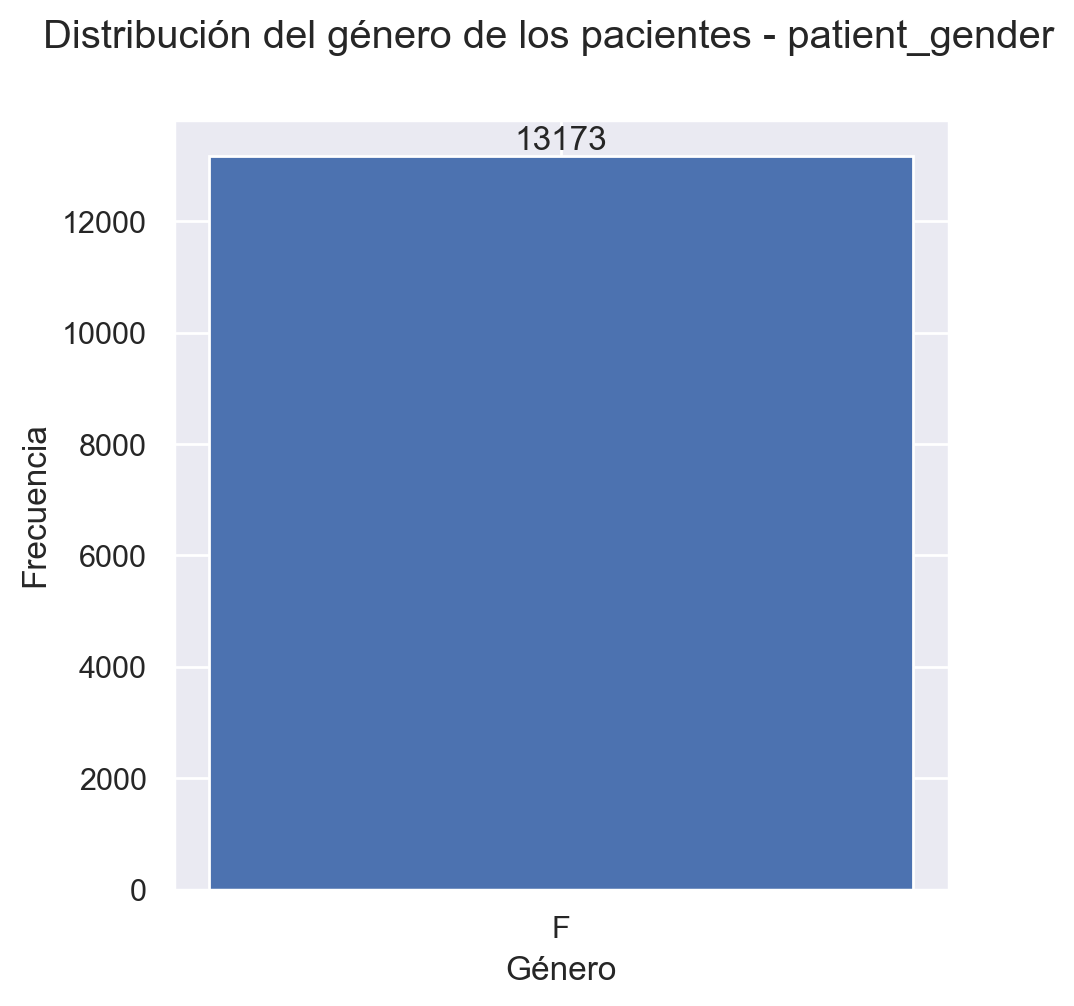

In [35]:
# Create the figure
fig = plt.figure(figsize=(5, 5));

# Create the barchart
plt.bar(x=df_metastasis["patient_gender"].value_counts().index,
        height=df_metastasis["patient_gender"].value_counts());
plt.bar_label(fig.gca().containers[0]);
plt.xlabel("Género");
plt.ylabel("Frecuencia");
plt.suptitle("Distribución del género de los pacientes - patient_gender");

**Todas las instancias tienen el mismo valor de la variable** - todas las instancias se corresponden a mujeres. Por lo tanto, **el atributo no tiene ningún poder discriminador**, y se puede descartar a la hora de construir modelos.

*(**NOTA**: Como se ha observado previamente, existen cuatro instancias cuyo diagnóstico de cancer hace referencia a cancer en hombres, pero el gran sesgo de la variable seguiría haciendo que fuese muy poco util de cara a la creación de modelos de regresión posteriores)*

### - **Tipos de tratamiento (`metastatic_first_novel_treatment`, `metastatic_first_novel_treatment_type`)**

Como se vio durante el estudio de valores perdidos, **la amplia mayoría de los valores de estas variables son desconocidos**. Esto puede deberse a que, según la descripción de la variable, este atributo hace referencia al tratamiento utilizado **tras el diagnóstico** - lo que puede significar que aún no está asignado o reflejado en el conjunto de datos.

Para visualización, se marcarán temporalmente con el valor `UNKNOWN`:

In [36]:
df_metastatic_first_novel_treatment = df_metastasis[["metastatic_first_novel_treatment", "metastatic_first_novel_treatment_type"]].fillna("UNKNOWN")
print(f"Número de valores: {len(df_metastatic_first_novel_treatment[df_metastatic_first_novel_treatment['metastatic_first_novel_treatment'] != 'UNKNOWN'])}")

Número de valores: 11


Si se observa la distribución de los valores de la variable:

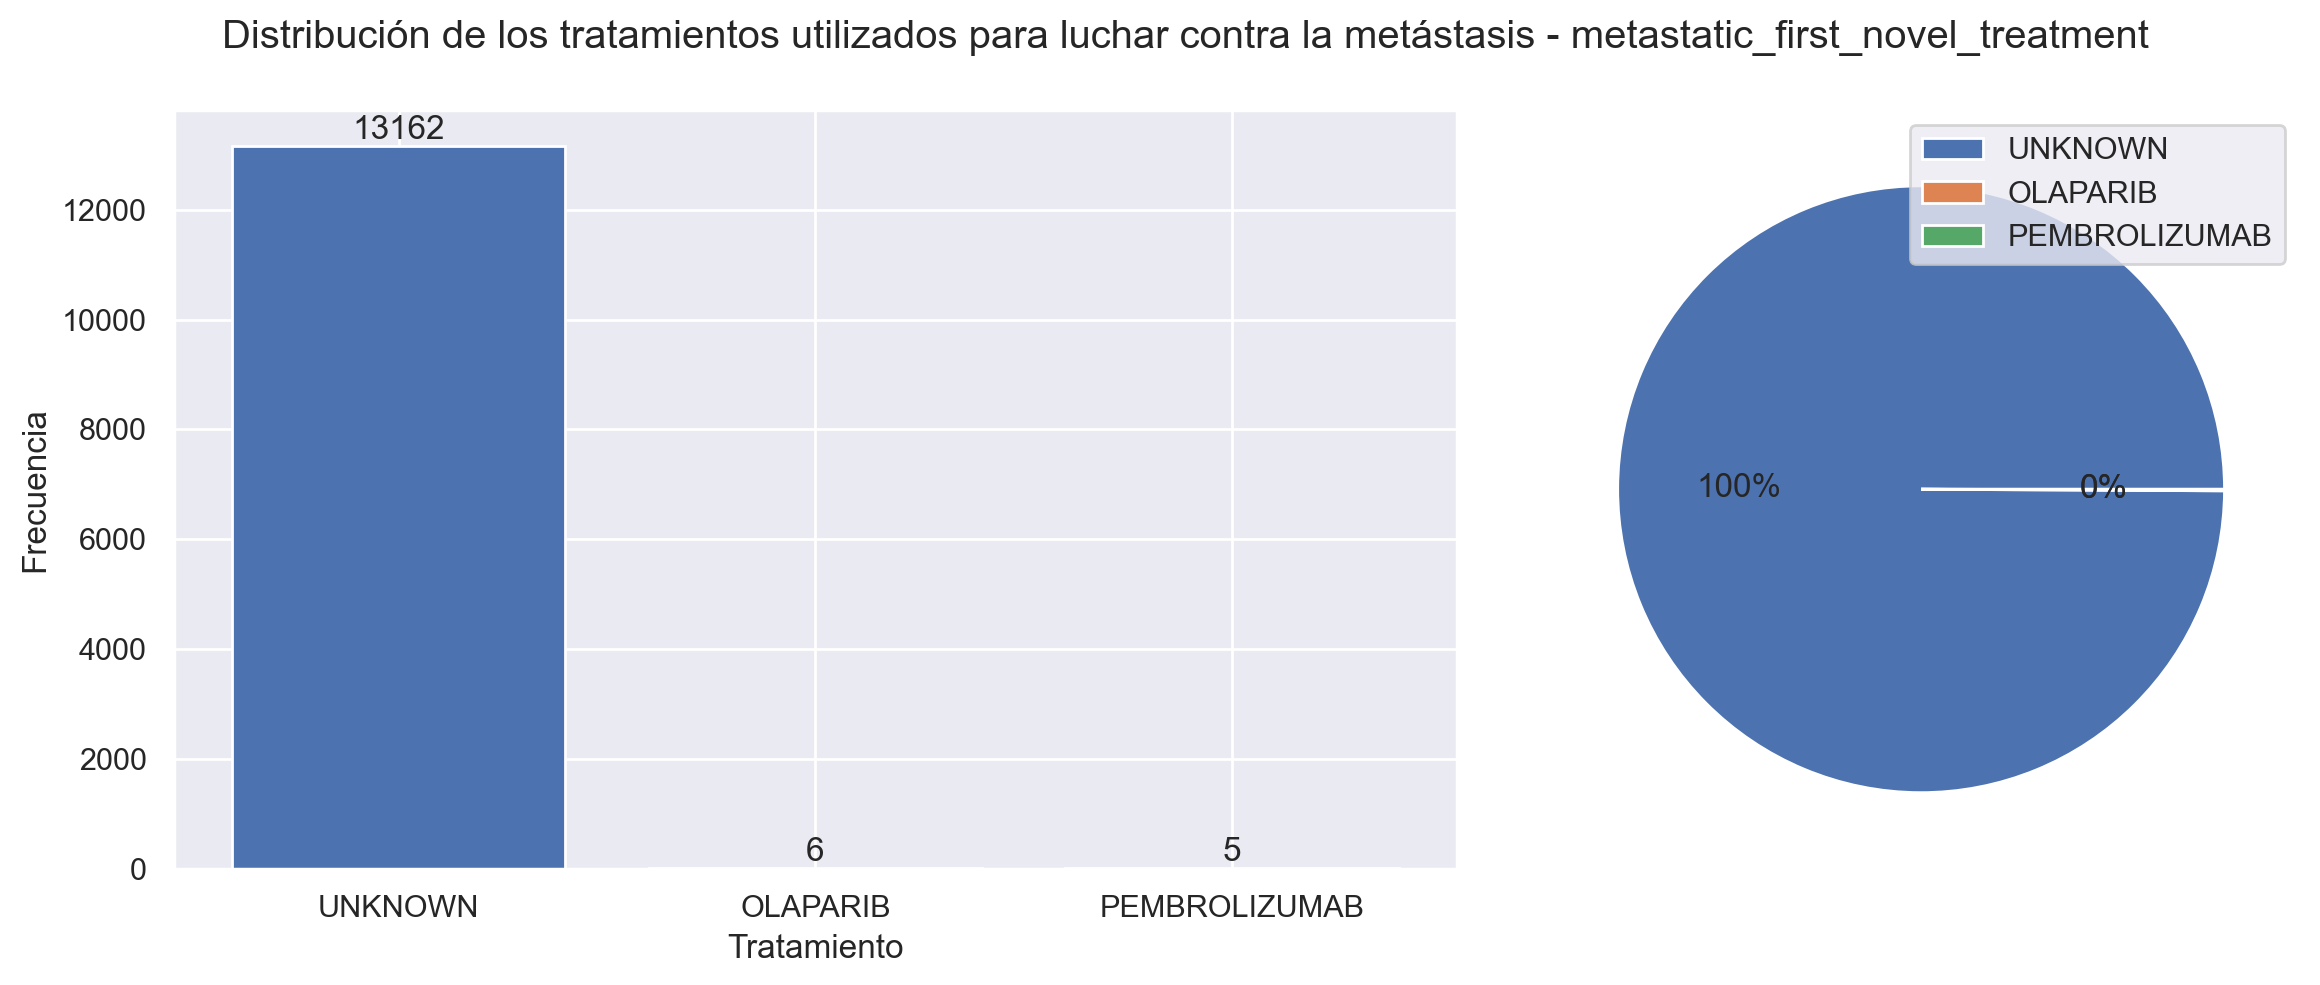

In [37]:
# Create the figure
fig, axs = plt.subplots(1, 2, 
                        figsize=(12, 5),
                        width_ratios=[1.5, 1]);

# FIGURE 1: Bar chart
axs[0].bar(x=df_metastatic_first_novel_treatment["metastatic_first_novel_treatment"].value_counts().index,
           height=df_metastatic_first_novel_treatment["metastatic_first_novel_treatment"].value_counts());
axs[0].bar_label(axs[0].containers[0]);
axs[0].set(xlabel="Tratamiento",
           ylabel="Frecuencia")

# FIGURE 2: Pie plot
axs[1].pie(x=df_metastatic_first_novel_treatment["metastatic_first_novel_treatment"].value_counts(),
           autopct="%1.f%%");
axs[1].legend(df_metastatic_first_novel_treatment["metastatic_first_novel_treatment"].value_counts().index);

# Add a title to the figure
fig.suptitle("Distribución de los tratamientos utilizados para luchar contra la metástasis - metastatic_first_novel_treatment")

# Show the figure
plt.tight_layout();
plt.show();

Como se puede ver, **únicamente 11 de las instancias tienen un valor conocido para la variable**. Con esta gran cantidad de valores perdidos, **no tiene sentido considerar el atributo durante la creación de modelos** - al tener muy poco poder discriminatorio.

### - **Ubicación geográfica (`patient_zip3`, `patient_state`, `Division`, `Region`)**

TODO Mover esto al estudio de atributos geoeconómicos

Siguiendo la definición que se ha realizado previamente de los atributos, se puede asumir que existe la siguiente **relación entre los atributos**:

1. Una **región** (`Region`) contiene varias **divisiones** (`Division`).
2. Una **división** (`Division`) contiene varios **estados** (`patient_state`).
3. Un **estado** (`patient_state`) contiene varios **códigos zip** (`patient_zip3`).

De esta forma, **todos los atributos realmente representan la misma información** - variando únicamente la **granularidad**:

In [38]:
print(f"Número de regiones únicas: {df_categorical['Region'].nunique()}")

print(f"Número de divisiones únicas: {df_categorical['Division'].nunique()}")
print(f"\t- Número de divisiones por región (promedio): {df_categorical.groupby('Region')['Division'].nunique().mean()}")

print(f"Número de estados únicos: {df_categorical['patient_state'].nunique()}")
print(f"\t- Número de estados por división (promedio): {df_categorical.groupby('Division')['patient_state'].nunique().mean()}")

print(f"Número de códigos zip únicos: {df_categorical['patient_zip3'].nunique()}")
print(f"\t- Número de códigos zip por estado (promedio): {df_categorical.groupby('patient_state')['patient_zip3'].nunique().mean()}")

Número de regiones únicas: 4
Número de divisiones únicas: 8
	- Número de divisiones por región (promedio): 2.0
Número de estados únicos: 44
	- Número de estados por división (promedio): 5.625
Número de códigos zip únicos: 751
	- Número de códigos zip por estado (promedio): 17.113636363636363


Como se puede ver, **la granularidad aumenta rápidamente**.
- El número de regiones (4) y divisiones (8) es razonable para ser estudiado de forma más individualizada.
- El número de estados (44) se puede estudiar de forma similar a como se han estudiado los códigos - comprobando la distribución general y observando los valores de los estados más frecuentes.
- El número de códigos zip (751) es excesivamente elevado como para estudiarlo de forma adecuada, pero se pueden realizar algunas observaciones.

Para comprobar la validez de los datos y que se cumple la teoría, se comprueba que **la granularidad se cumpla en dirección contraria** - es decir, que (por ejemplo) **cada división pertenezca únicamente a una región**:

In [39]:
print(f"Número de regiones a los que pertenece cada división (promedio): {df_categorical.groupby('Division')['Region'].nunique().mean()}")
print(f"Número de divisiones a los que pertenece cada estado (promedio): {df_categorical.groupby('patient_state')['Division'].nunique().mean()}")
print(f"Número de estados a los que pertenece cada código zip (promedio): {df_categorical.groupby('patient_zip3')['patient_state'].nunique().mean()}")

Número de regiones a los que pertenece cada división (promedio): 1.0
Número de divisiones a los que pertenece cada estado (promedio): 1.0227272727272727
Número de estados a los que pertenece cada código zip (promedio): 1.0026631158455392


Parece ser que existen algunos casos en los que no se cumplen estas restricciones - concretamente:
- Algunos **estados** pertenecen a **dos o más divisiones**.
- Algunos **códigos zip** pertenecen a **dos o más estados**

Estudiando la distribución de estos **estados**:

In [40]:
(
    df_categorical[["Division", "patient_state"]]                               # 1 - Obtain the division and patient_state
    [df_categorical["patient_state"].isin(                                      # 2 - Extract only the instances with a state in more than 2 divisions
      (df_categorical.groupby('patient_state')['Division'].nunique() >= 2).index[(df_categorical.groupby('patient_state')['Division'].nunique() >= 2)].tolist()  
    )]
    .groupby(["patient_state", "Division"]).agg(count=("patient_state", len))   # 3 - Group by patient state AND division, and count
)

count
patient_state Division       
CA            Mountain      1
              Pacific    2376

Sorprendentemente, el problema ocurre **únicamente en una instancia de un estado** - el estado de California está en la división de **Pacific**, excepto por una instancia que lo clasifica como **Mountain**. 

[Datos externos](https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States) confirman que California debería pertenecer a Pacific. Por tanto, esto podría deberse a un **error durante la creación del conjunto de datos** - que será resuelto durante el pre-procesamiento del conjunto de datos.

Estudiando la distribución de los **códigos zip**:

In [41]:
(
    df_categorical[["patient_state", "patient_zip3"]]                                     # 1 - Obtain the division and patient_state
    [df_categorical["patient_zip3"].isin(                                                 # 2 - Extract only the instances with a state in more than 2 divisions
      (df_categorical.groupby('patient_zip3')['patient_state'].nunique() >= 2).index[(df_categorical.groupby('patient_zip3')['patient_state'].nunique() >= 2)].tolist()  
    )]
    .groupby(["patient_zip3", "patient_state"]).agg(count=("patient_state", len))         # 3 - Group by patient zip code AND state, and count
    
)

count
patient_zip3 patient_state       
630          IL                 1
             MO                22
864          AZ                 4
             CA                 1

De nuevo, parecen ser errores de anotación a la hora de crear el conjunto de datos. 

[Datos externos](https://simple.wikipedia.org/wiki/List_of_ZIP_Code_prefixes)

---



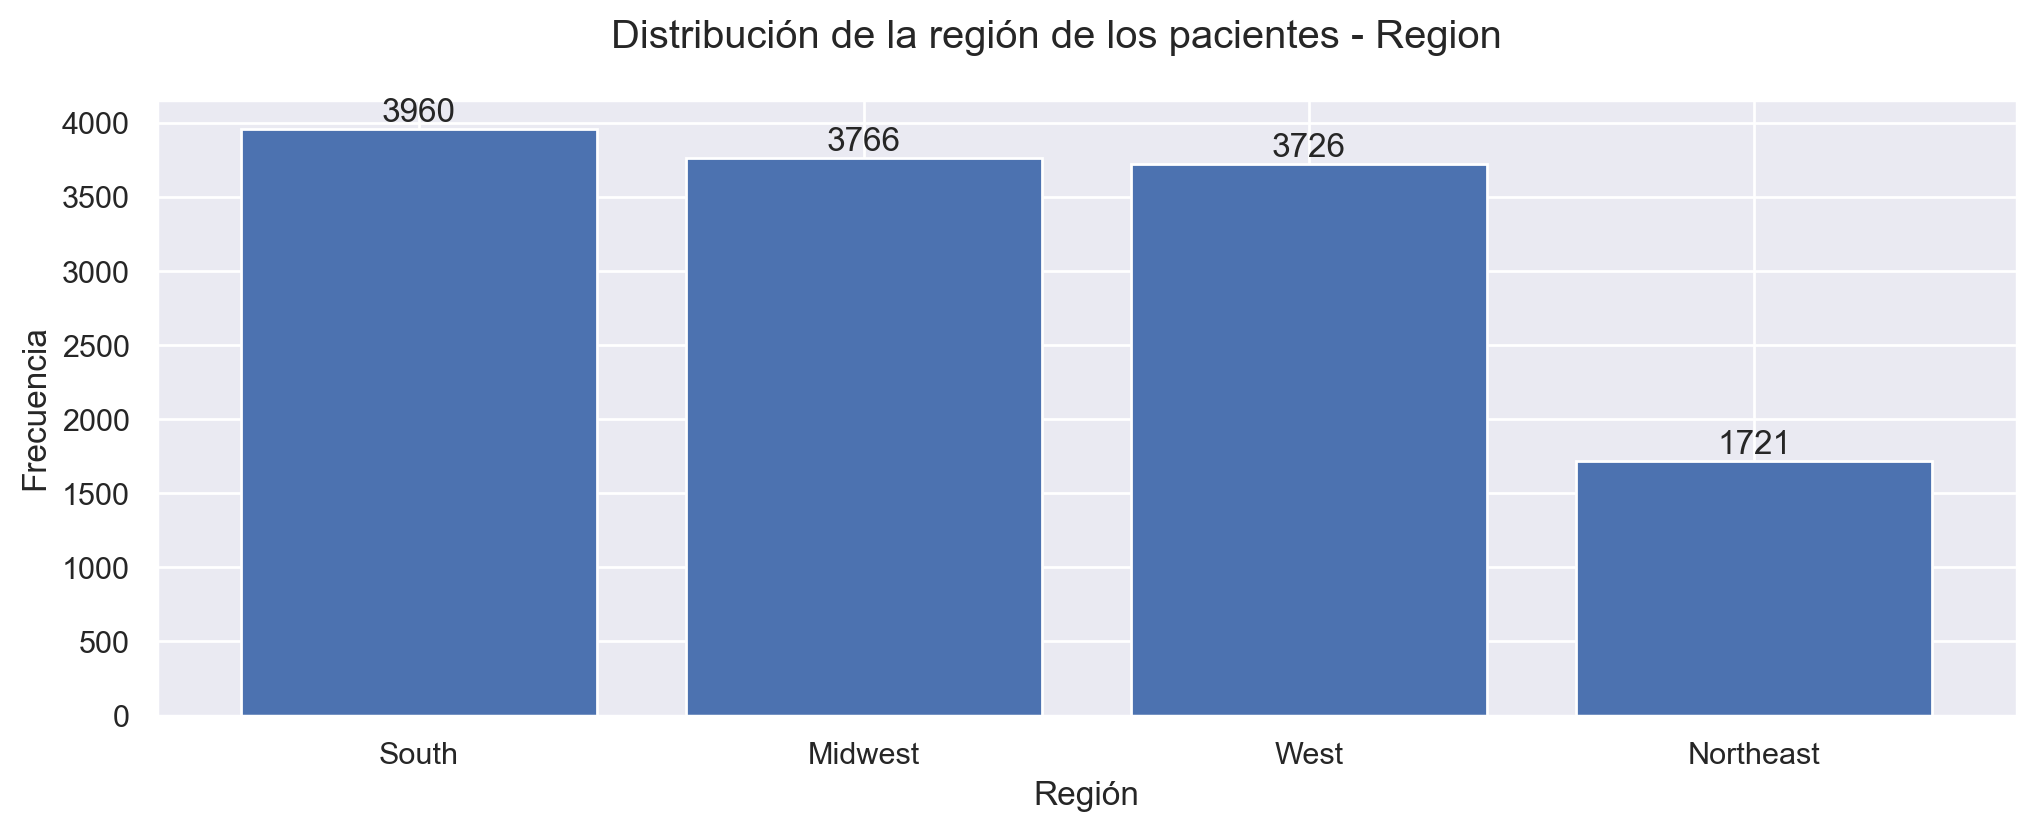

In [42]:
# Create the figure
fig = plt.figure(figsize=(12, 4));

# Create the barchart
plt.bar(x=df_metastasis["Region"].value_counts().index,
        height=df_metastasis["Region"].value_counts());
plt.bar_label(fig.gca().containers[0]);
plt.xlabel("Región");
plt.ylabel("Frecuencia");
plt.suptitle("Distribución de la región de los pacientes - Region");

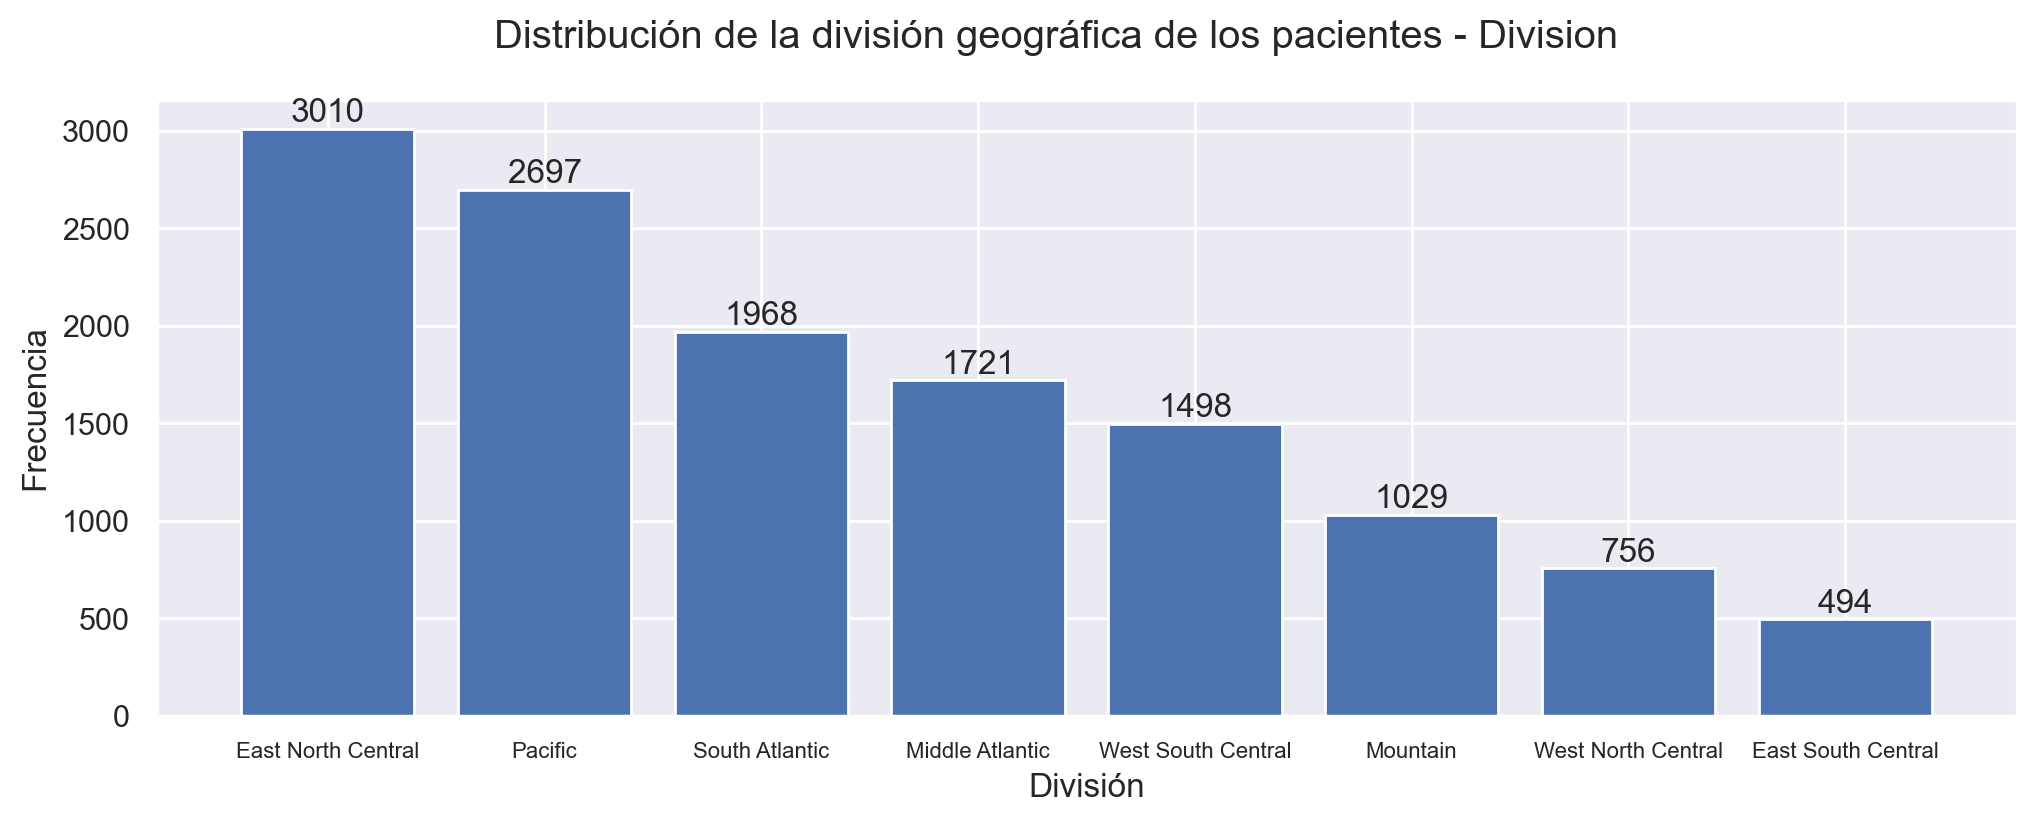

In [43]:
# Create the figure
fig = plt.figure(figsize=(12, 4));

# Create the barchart
plt.bar(x=df_metastasis["Division"].value_counts().index,
        height=df_metastasis["Division"].value_counts());
plt.bar_label(fig.gca().containers[0]);
plt.xlabel("División");
plt.xticks(fontsize=8)
plt.ylabel("Frecuencia");

plt.suptitle("Distribución de la división geográfica de los pacientes - Division");

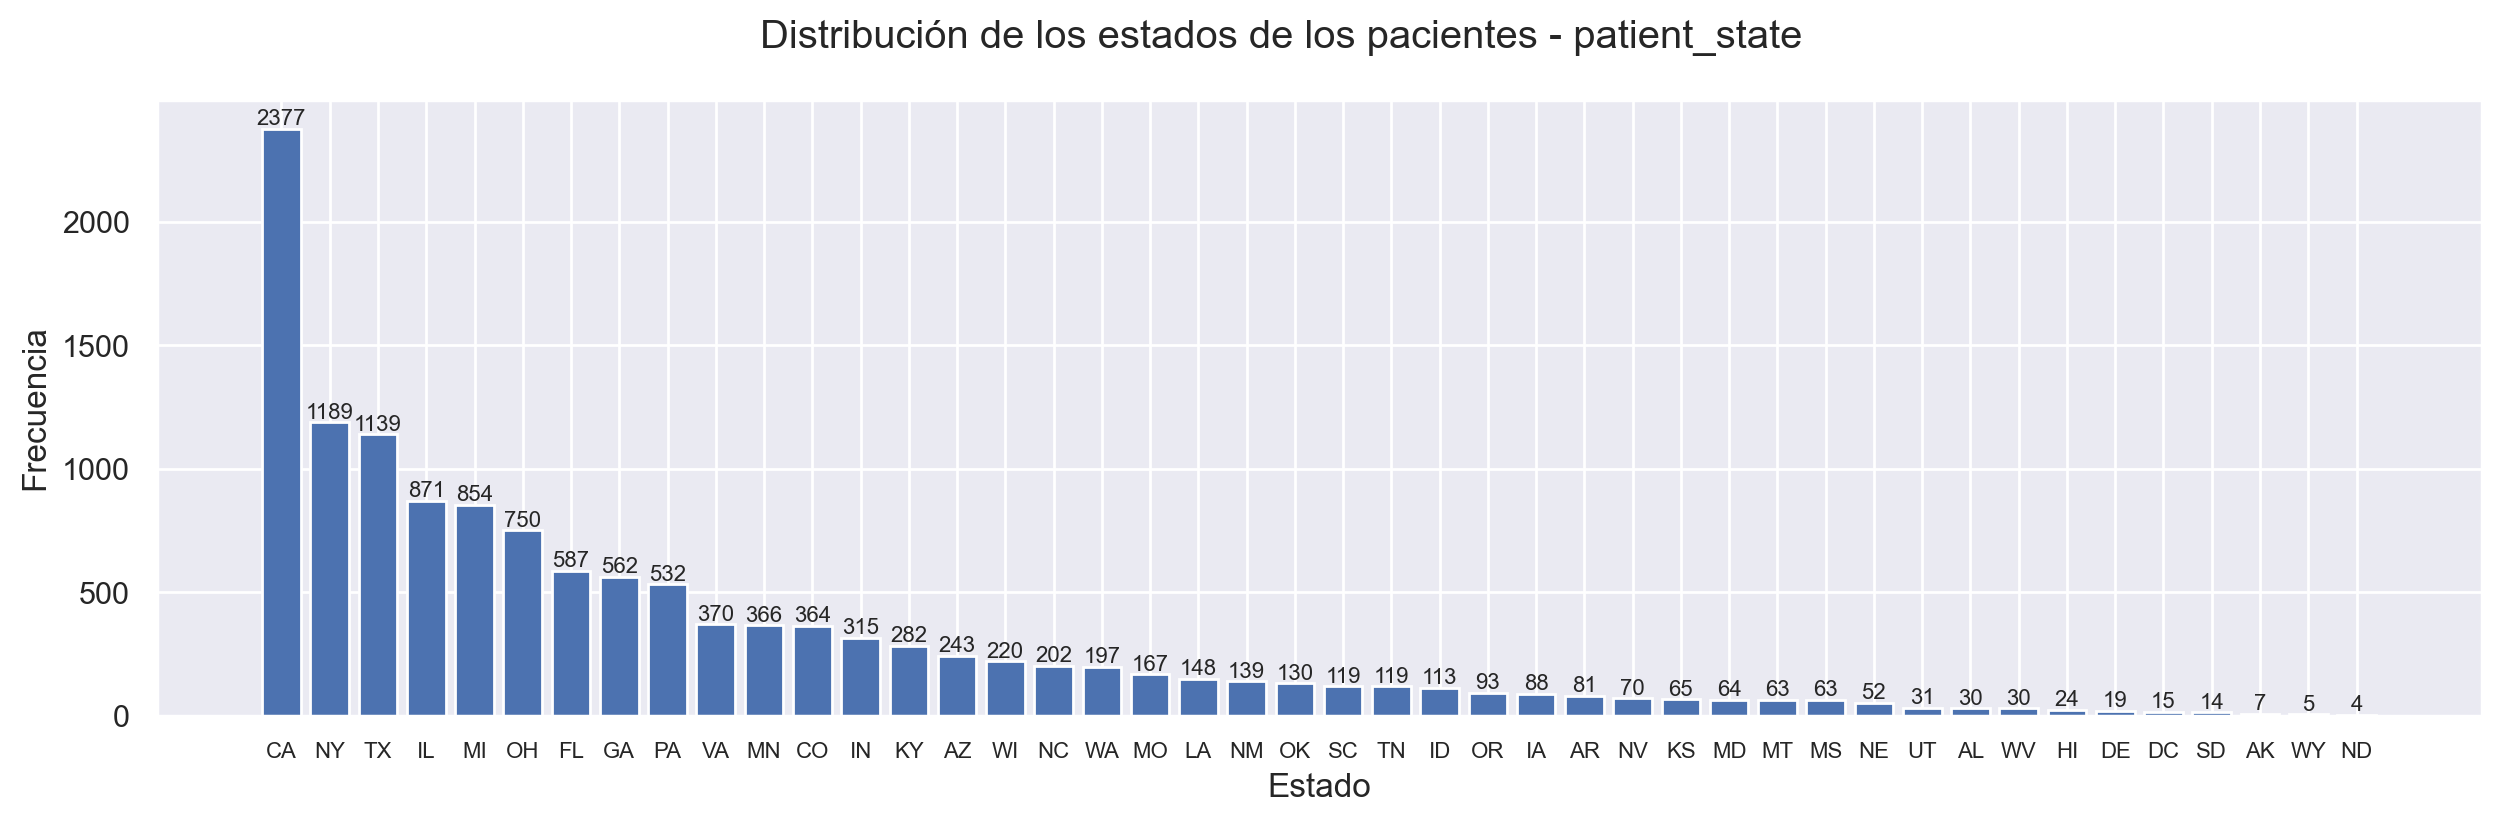

In [44]:
# Create the figure
fig = plt.figure(figsize=(15, 4));

# Create the barchart
plt.bar(x=df_metastasis["patient_state"].value_counts().index,
        height=df_metastasis["patient_state"].value_counts());
plt.bar_label(fig.gca().containers[0], fontsize=8);
plt.xlabel("Estado");
plt.xticks(fontsize=8)
plt.ylabel("Frecuencia");

plt.suptitle("Distribución de los estados de los pacientes - patient_state");

In [45]:
display((
    df_metastasis.reset_index(drop=True)[["Division", "Region", "patient_state", "patient_zip3", "metastatic_diagnosis_period"]]
    .groupby(["Region", "Division", "patient_state", "patient_zip3"]).count()
))

metastatic_diagnosis_period
Region  Division           patient_state patient_zip3                             
Midwest East North Central IL            600                                   117
                                         601                                    95
                                         602                                     3
                                         603                                     3
                                         604                                   144
...                                                                            ...
West    Pacific            WA            990                                     7
                                         991                                     5
                                         992                                    11
                                         993                                     7
                                         994                                     1

[753 rows x 1 columns]

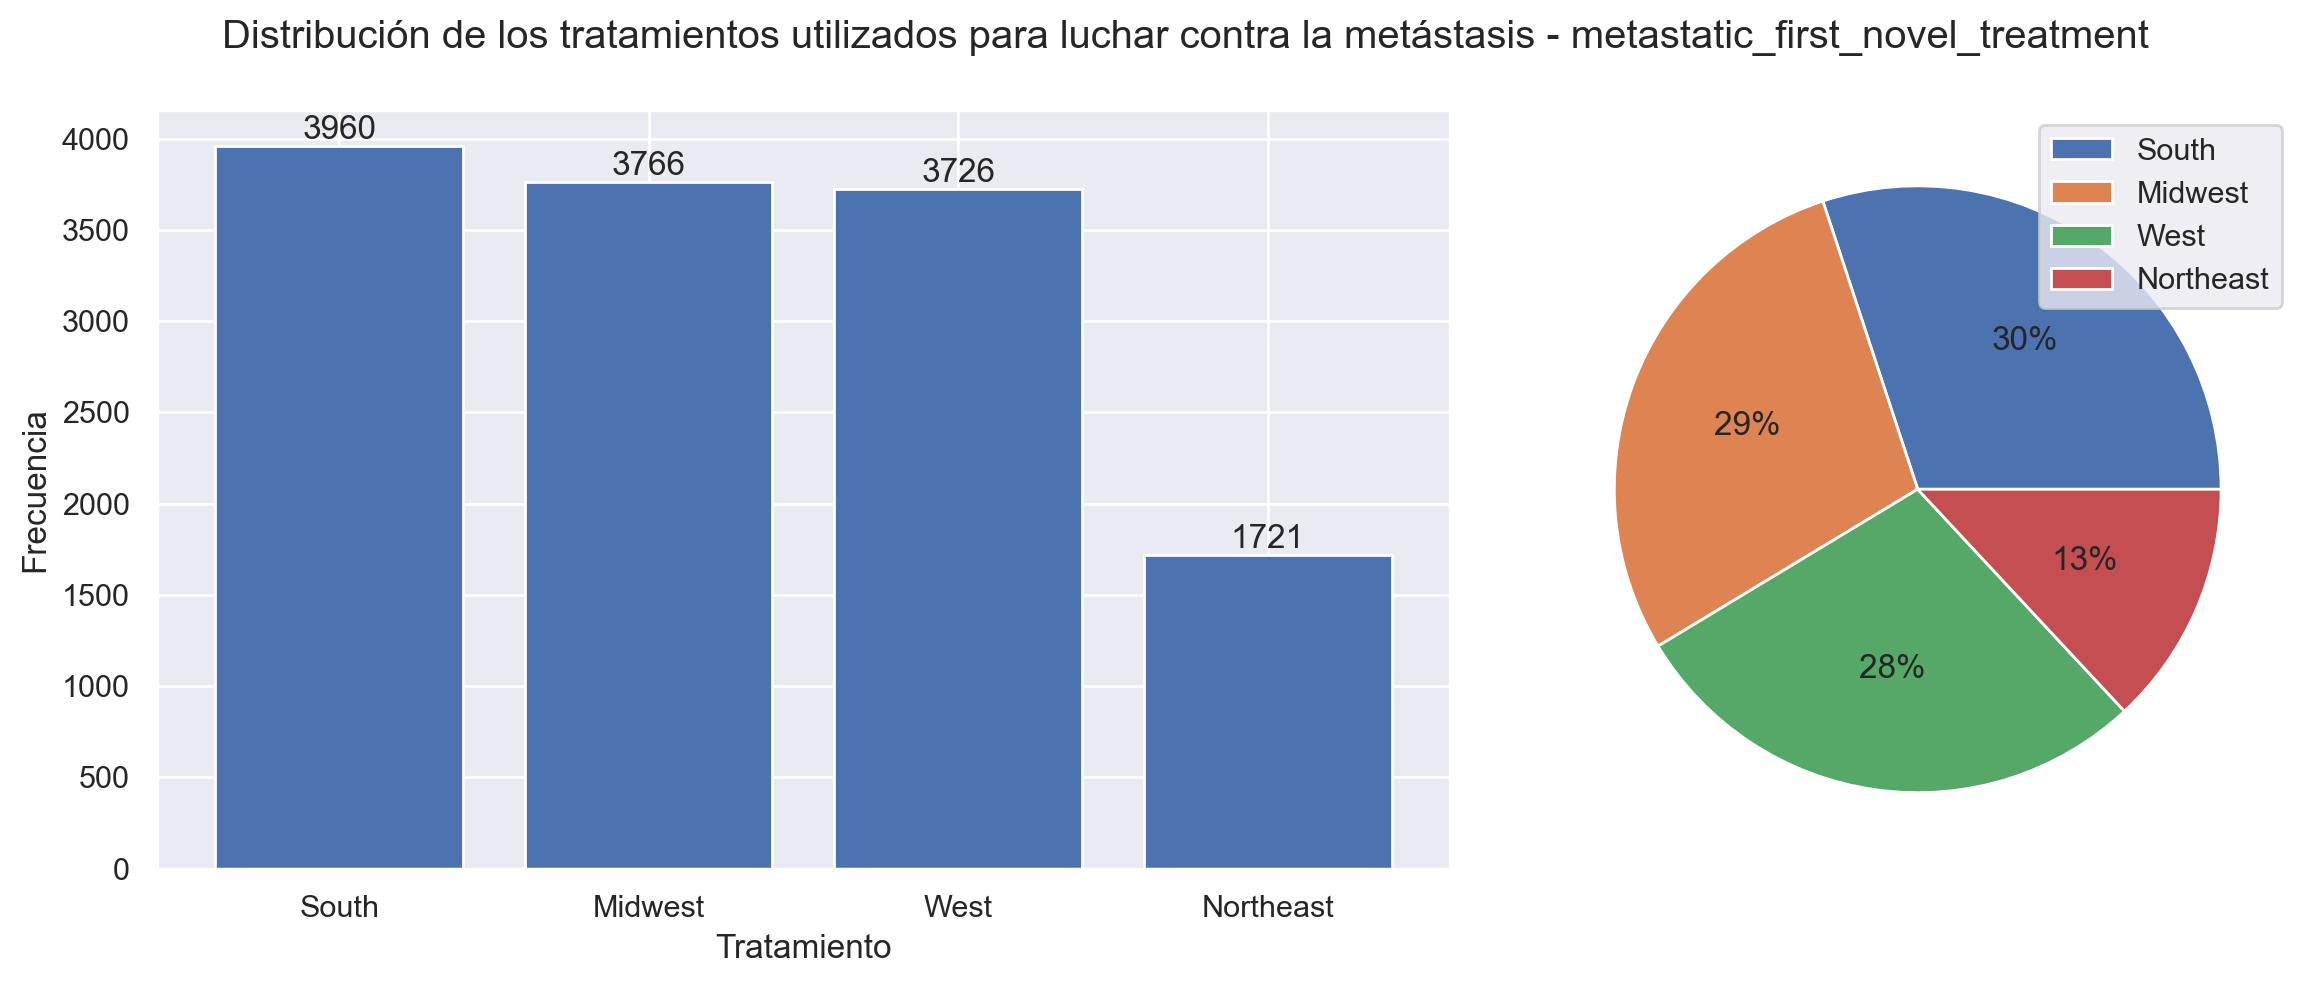

In [46]:
#REGION
# Create the figure
fig, axs = plt.subplots(1, 2, 
                        figsize=(12, 5),
                        width_ratios=[1.5, 1]);

# FIGURE 1: Bar chart
axs[0].bar(x=df_metastasis["Region"].value_counts().index,
           height=df_metastasis["Region"].value_counts());
axs[0].bar_label(axs[0].containers[0]);
axs[0].set(xlabel="Tratamiento",
           ylabel="Frecuencia")

# FIGURE 2: Pie plot
axs[1].pie(x=df_metastasis["Region"].value_counts(),
           autopct="%1.f%%");
axs[1].legend(df_metastasis["Region"].value_counts().index);

# Add a title to the figure
fig.suptitle("Distribución de los tratamientos utilizados para luchar contra la metástasis - metastatic_first_novel_treatment")

# Show the figure
plt.tight_layout();
plt.show();

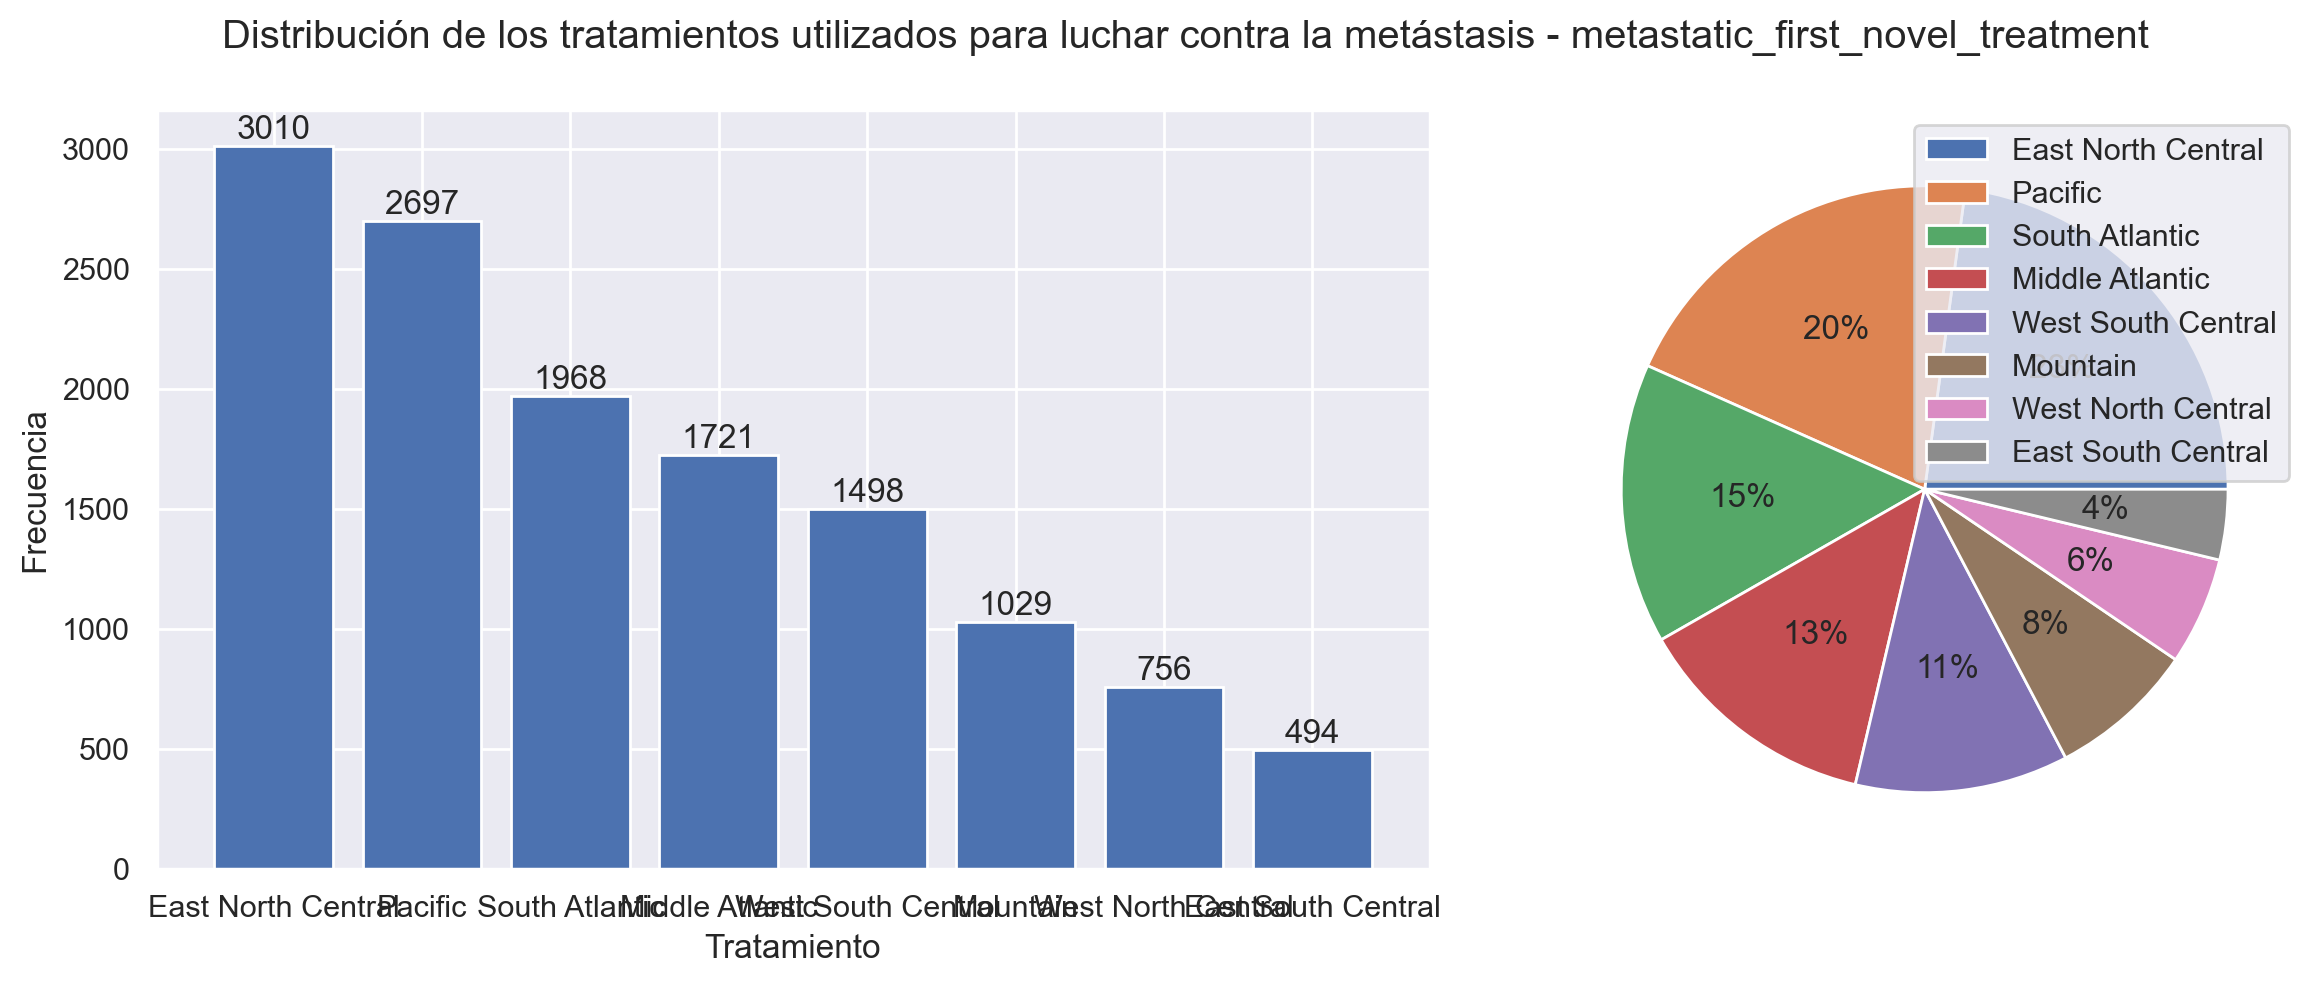

In [47]:
#REGION
# Create the figure
fig, axs = plt.subplots(1, 2, 
                        figsize=(12, 5),
                        width_ratios=[1.5, 1]);

# FIGURE 1: Bar chart
axs[0].bar(x=df_metastasis["Division"].value_counts().index,
           height=df_metastasis["Division"].value_counts());
axs[0].bar_label(axs[0].containers[0]);
axs[0].set(xlabel="Tratamiento",
           ylabel="Frecuencia")

# FIGURE 2: Pie plot
axs[1].pie(x=df_metastasis["Division"].value_counts(),
           autopct="%1.f%%");
axs[1].legend(df_metastasis["Division"].value_counts().index);

# Add a title to the figure
fig.suptitle("Distribución de los tratamientos utilizados para luchar contra la metástasis - metastatic_first_novel_treatment")

# Show the figure
plt.tight_layout();
plt.show();

<a id="section2-4"></a>

## 2.4. Estudio de atributos numéricos

<a id="section2-5"></a>

## 2.5. Estudio de atributos geoeconómicas y climáticos

## 2.6. Selección de variables

PARA PREPROCESAMIENTO:
- CAMBIAR CODIGOS DE MASCULINO A FEMENINO
- CORREGIR LOS ESTADOS EN DIVISIONES ERRONEAS